# 영화 관객수 예측 경진대회[데이콘]
- https://dacon.io/competitions/open/235536/overview/description
- 평가 : RMSE
- 공공 데이터와 같이 누구나 얻을 수 있고 법적 `제약이 없는 외부 데이터 허용`
- 사전학습 모델의 경우 `사전학습에 사용된 데이터를 명시`해야 함
- 타겟 : box_off_num

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.5f}'.format

from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/content/drive/MyDrive/github/영화 관객수 예측 경진대회/data/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/github/영화 관객수 예측 경진대회/data/movies_test.csv')
submission = pd.read_csv("/content/drive/MyDrive/github/영화 관객수 예측 경진대회/data/submission.csv")

# 데이터 탐색

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.00000,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25000,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.66667,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.00000,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.00000,1,380,1


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.00000,270.00000,600.00000,600.00000,600.00000,600.00000
mean,100.86333,1050442.89142,0.87667,151.11833,3.70667,708181.75167
std,18.09753,1791408.30346,1.18341,165.65467,2.44689,1828005.85114
min,45.00000,1.00000,0.00000,0.00000,0.00000,1.00000
25%,89.00000,20380.00000,0.00000,17.00000,2.00000,1297.25000
50%,100.00000,478423.62500,0.00000,82.50000,3.00000,12591.00000
75%,114.00000,1286568.62500,2.00000,264.00000,4.00000,479886.75000
max,180.00000,17615314.00000,5.00000,869.00000,25.00000,14262766.00000


In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.00000,0.26468,0.30673,0.62321,0.11415,0.44145
dir_prev_bfnum,0.26468,1.00000,0.13182,0.32352,0.08382,0.28318
dir_prev_num,0.30673,0.13182,1.00000,0.45071,0.01401,0.25967
num_staff,0.62321,0.32352,0.45071,1.00000,0.07787,0.54426
num_actor,0.11415,0.08382,0.01401,0.07787,1.00000,0.11118
box_off_num,0.44145,0.28318,0.25967,0.54426,0.11118,1.00000


## title : 영화의 제목

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['title'].isna().any())
print("test 결측치 존재 :",test['title'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
# 중복 없이 1개씩 존재
train['title'].value_counts().sort_values()

개들의 전쟁       1
별이 빛나는 밤     1
은밀하게 위대하게    1
나는 공무원이다     1
불량남녀         1
            ..
오빠가 돌아왔다     1
해무           1
파파로티         1
악의 연대기       1
베를린          1
Name: title, Length: 600, dtype: int64

In [ ]:
# 제목 길이에 따른 관객수 비교
train.sort_values(by=['box_off_num'],ascending=False)[['title','box_off_num']]

,title,box_off_num
372,국제시장,14262766
362,도둑들,12983841
530,7번방의 선물,12811435
498,암살,12706663
460,"광해, 왕이 된 남자",12323595
...,...,...
481,려수,36
410,전망 좋은 방-밀애,10
338,타부 : 금지된 사랑,8
324,청아,2


In [ ]:
# 1000만 영화 타이틀
train[train['box_off_num'] > 10000000]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,NaN,0,311,5,11374879
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2564691.66667,3,462,10,12983841
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1552541.00000,2,402,3,12323595
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5169479.00000,4,628,3,12706663
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.50000,2,300,8,12811435


## distributor : 배급사

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['distributor'].isna().any())
print("test 결측치 존재 :",test['distributor'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
# 배급사 종류 
distributors_train = train['distributor'].value_counts().index
distributors_test = test['distributor'].value_counts().index
print(len(distributors_train))
print(len(distributors_test))

169
93


In [ ]:
# 배급사 종류보기
d_t_2 = distributors_train.str.replace("\(주\)","").str.strip() # (주) 제거, 양쪽 공백제거
for i in d_t_2.sort_values():
  print(i)

BoXoo 엔터테인먼트
CGV 무비꼴라쥬
CGV 아트하우스
CGV아트하우스
CJ CGV
CJ E&M Pictures
CJ E&M 영화부문
CJ 엔터테인먼트
JK필름
KBS미디어
KT
KT&G 상상마당
M2픽처스
NEW
NEW
OAL(올)
SBS콘텐츠허브
SK텔레콤
SK플래닛
THE 픽쳐스
tvN
ysfilm
건시네마
고구마공작소
고앤고 필름
골든타이드픽처스
김기덕 필름
나우콘텐츠
나이너스엔터테인먼트
노바엔터테인먼트
노버스엔터테인먼트
대명문화공장
더 피플
더픽쳐스
더픽쳐스/마운틴픽쳐스
동국대학교 충무로영상제작센터
두 엔터테인먼트
두타연
드림로드
드림팩트 엔터테인먼트
드림팩트엔터테인먼트
디 씨드
디마엔터테인먼트
랠리버튼
레인보우 팩토리
로드하우스
롤러코스터 프로덕션
롯데엔터테인먼트
리틀빅픽처스
리틀빅픽처스
리틀빅픽쳐스
마노엔터테인먼트
마법사필름
마운틴 픽처스
마운틴픽쳐스
마인스 엔터테인먼트
마인스엔터테인먼트
머스트 씨 무비
메가박스플러스엠
무비꼴라쥬
미디어데이
미라클 필름
백두대간
보람엔터테인먼트
브릿지웍스
사람과 사람들
상구네 필름
새인컴퍼니
서울독립영화제
쇼박스
쇼박스미디어플렉스
스마일이엔티
스크린조이
스토리셋
스톰픽쳐스코리아
스튜디오 느림보
스튜디오 블루
스튜디오후크
스폰지
스폰지이엔티
시너지
시네마 달
시네마달
시네마달
시네마서비스
싸이더스
싸이더스 FNH
싸이더스FNH
씨너스엔터테인먼트
씨네굿필름
씨네그루키다리이엔티
씨엠닉스
아방가르드 필름
아우라픽처스
아이필름코퍼레이션
액티버스엔터테인먼트
어뮤즈
어썸 피플
에스와이코마드
에스피엠
에이블엔터테인먼트
에이원 엔터테인먼트
에이원 엔터테인먼트
엣나인필름
영구아트무비
영화사 廊
영화사 조아
영화사 진진
영화사조제
영화제작전원사
영희야놀자
예지림 엔터테인먼트
오퍼스픽쳐스
온비즈넷
와이드 릴리즈
와이드릴리즈
웃기씨네
위더스필름
위드시네마
유니버설픽쳐스인터내셔널코리아
유비네트워크
유비콘텐츠
이달투
이모션 픽처스
이상우필름
이스트스카이필름
이십세기폭스코리아
인디스토리
인디플러그
인벤트 디
인터콘미디어
인피니티엔터테인먼트

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


- NEW vs (주)NEW
  - NEW
- 드림팩트 엔터테인먼트 vs 드림팩트엔터테인먼트
  - 드림팩트엔터테인먼트
- 리틀빅픽처스 vs 리틀빅픽처스 vs 리틀빅픽쳐스
  - 리틀빅픽처스
- 마운틴 픽처스 vs 마운틴픽쳐스
  - 마운틴픽쳐스
- 마인스 엔터테인먼트 vs 마인스엔터테인먼트
  - 마인스엔터테인먼트
- 시네마 달 vs 시네마달 vs 시네마달
  - 시네마달
- 싸이더스 FNH vs 싸이더스FNH vs 싸이더스
  - 싸이더스
- (주)에이원 엔터테인먼트 vs 에이원 엔터테인먼트
  - 에이원 엔터테인먼트
- 와이드 릴리즈 vs 와이드릴리즈
  - 와이드릴리즈
- 영화사 廊
  -  랑 (사랑채/행랑)

In [ ]:
# 배급사 같은거 처리
train['distributor2'] = train['distributor'].str.replace("\(주\)","").str.strip()

train['distributor2'] = train['distributor2'].str.replace("드림팩트 엔터테인먼트", "드림팩트엔터테인먼트")

train['distributor2'] = train['distributor2'].str.replace("리틀빅픽쳐스", "리틀빅픽처스")

train['distributor2'] = train['distributor2'].str.replace("마운틴픽쳐스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("마운틴 픽처스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("더픽쳐스/마운틴픽쳐스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("더픽쳐스/마운틴픽처스", "마운틴픽처스")

train['distributor2'] = train['distributor2'].str.replace("시네마 달", "시네마달")

train['distributor2'] = train['distributor2'].str.replace("마인스 엔터테인먼트", "마인스엔터테인먼트")

train['distributor2'] = train['distributor2'].str.replace("싸이더스FNH", "싸이더스")
train['distributor2'] = train['distributor2'].str.replace("싸이더스 FNH", "싸이더스")

train['distributor2'] = train['distributor2'].str.replace("와이드 릴리즈", "와이드릴리즈")

train['distributor2'] = train['distributor2'].str.replace("영화사 廊", "영화사랑")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


- 영화사 검색
- https://www.kobis.or.kr/kobis/mobile/mast/comp/searchCompanyDtl.do?companyCd=20122895

In [ ]:
train['distributor2'].value_counts()[train['distributor2'].value_counts() > 2]

CJ 엔터테인먼트       54
롯데엔터테인먼트        52
NEW             38
마운틴픽처스          33
인디스토리           26
쇼박스             26
시네마달            18
골든타이드픽처스        15
케이알씨지           14
어뮤즈             10
시너지             10
영화사 진진          10
영화사조제           10
키노아이            10
리틀빅픽처스           9
인디플러그            9
인벤트 디            8
KT&G 상상마당        8
스폰지              7
팝엔터테인먼트          6
BoXoo 엔터테인먼트     6
시네마서비스           6
필라멘트 픽쳐스         6
무비꼴라쥬            6
CGV아트하우스         5
마인스엔터테인먼트        5
싸이더스             5
씨너스엔터테인먼트        4
홀리가든             4
엣나인필름            4
메가박스플러스엠         4
나이너스엔터테인먼트       4
드림팩트엔터테인먼트       4
마노엔터테인먼트         4
타임스토리그룹          3
CJ E&M 영화부문      3
브릿지웍스            3
이십세기폭스코리아        3
이모션 픽처스          3
씨네그루키다리이엔티       3
KT               3
김기덕 필름           3
트리필름             3
영화제작전원사          3
Name: distributor2, dtype: int64

In [ ]:
train['distributor2'].value_counts()[train['distributor2'].value_counts() == 2]

SBS콘텐츠허브           2
에스피엠               2
백두대간               2
에이원 엔터테인먼트         2
CGV 아트하우스          2
스톰픽쳐스코리아           2
CJ E&M Pictures    2
파이오니아21            2
화앤담이엔티             2
드림로드               2
쇼박스미디어플렉스          2
와이드릴리즈             2
노바엔터테인먼트           2
프레인글로벌             2
서울독립영화제            2
조이앤시네마             2
액티버스엔터테인먼트         2
웃기씨네               2
Name: distributor2, dtype: int64

In [ ]:
train['distributor2'].value_counts()[train['distributor2'].value_counts() == 1]

새인컴퍼니       1
스튜디오 느림보    1
케이엠스타       1
고구마공작소      1
상구네 필름      1
           ..
JK필름        1
사람과 사람들     1
고앤고 필름      1
오퍼스픽쳐스      1
퍼스트런        1
Name: distributor2, Length: 94, dtype: int64

## genre : 장르

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['genre'].isna().any())
print("test 결측치 존재 :",test['genre'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [ ]:
# 장르별 describe()
train.groupby('genre')['box_off_num'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
드라마,221.00000,625689.79186,1820023.07240,2.00000,1040.00000,7173.00000,387408.00000,14262766.00000
다큐멘터리,93.00000,67172.25806,498761.61643,65.00000,1068.00000,3044.00000,12486.00000,4802169.00000
멜로/로맨스,78.00000,425968.03846,934796.09233,1.00000,602.75000,3653.00000,308578.50000,4598985.00000
코미디,53.00000,1193914.00000,2399755.47735,72.00000,6034.00000,210775.00000,972431.00000,12811435.00000
공포,42.00000,590832.52381,1001799.49551,42.00000,3380.25000,179810.00000,840518.25000,5604106.00000
액션,28.00000,2203974.07143,3090758.96828,257.00000,159613.75000,1147846.50000,2380494.75000,12706663.00000
느와르,27.00000,2263695.11111,2809886.54014,458.00000,193176.00000,1646142.00000,2847251.50000,12983841.00000
애니메이션,21.00000,181926.66667,483937.56261,81.00000,13113.00000,23802.00000,56105.00000,2202788.00000
미스터리,17.00000,527548.17647,1396794.62425,205.00000,1132.00000,3199.00000,270602.00000,5443049.00000


Q3 값 :  387408.0
총 개수 : 221
Q3 이상 개수 : 55
Q3 이하 개수 : 166


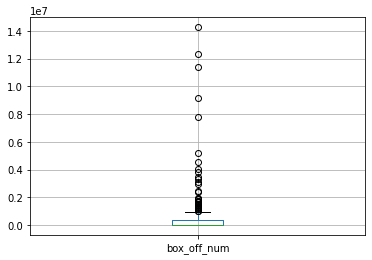

In [ ]:
# 드라마 관객수 이상치 확인 , 800만 이상 
gr = "드라마"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 값 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 값 :  12486.0
총 개수 : 93
Q3 이상 개수 : 23
Q3 이하 개수 : 70


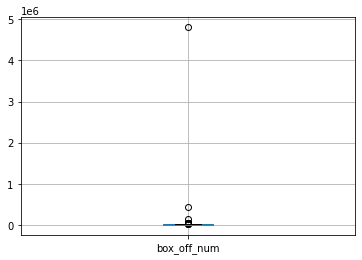

In [ ]:
# 다큐멘터리 관객수 이상치 확인 , 400만 
gr = "다큐멘터리"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 값 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  308578.5
총 개수 : 78
Q3 이상 개수 : 20
Q3 이하 개수 : 58


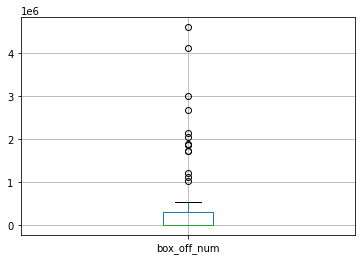

In [ ]:
# 멜로/로맨스 관객수 이상치 확인 (250만)
gr = "멜로/로맨스"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  972431.0
총 개수 : 53
Q3 이상 개수 : 13
Q3 이하 개수 : 40


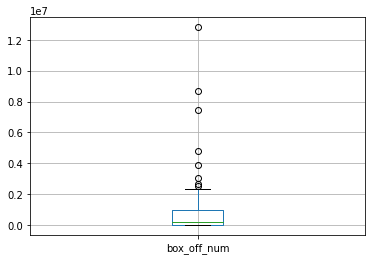

In [ ]:
# 코미디 관객수 이상치 확인 (700만)
gr = "코미디"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  840518.25
총 개수 : 42
Q3 이상 개수 : 11
Q3 이하 개수 : 31


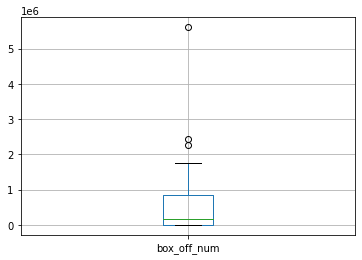

In [ ]:
# 공포 관객수 이상치 확인 (500만)
gr = "공포"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  2380494.75
총 개수 : 28
Q3 이상 개수 : 7
Q3 이하 개수 : 21


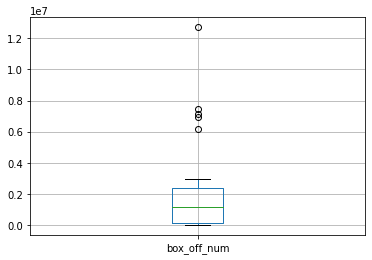

In [ ]:
# 액션 관객수 이상치 확인 (1000만)
gr = "액션"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  2847251.5
총 개수 : 27
Q3 이상 개수 : 7
Q3 이하 개수 : 20


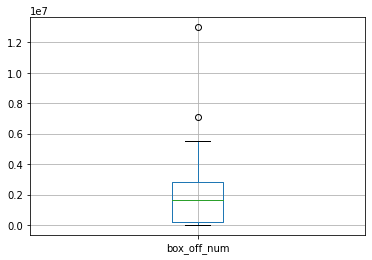

In [ ]:
# 느와르 관객수 이상치 확인 (1000만)
gr = "느와르"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  56105.0
총 개수 : 21
Q3 이상 개수 : 5
Q3 이하 개수 : 16


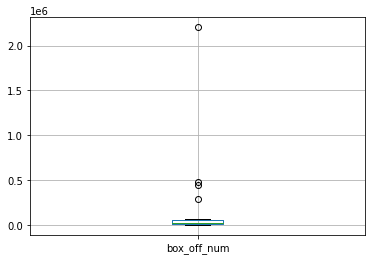

In [ ]:
# 애니메이션 관객수 이상치 확인 (200만)
gr = "애니메이션"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  270602.0
총 개수 : 17
Q3 이상 개수 : 4
Q3 이하 개수 : 13


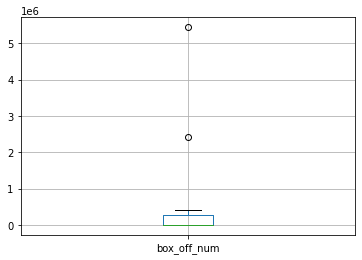

In [ ]:
# 미스터리 관객수 이상치 확인 (500만)
gr = "미스터리"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  2130645.0
총 개수 : 13
Q3 이상 개수 : 3
Q3 이하 개수 : 10


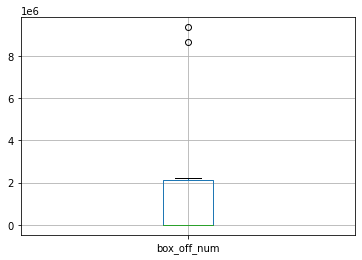

In [ ]:
# SF 관객수 이상치 확인 (800만)
gr = "SF"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  8083.0
총 개수 : 5
Q3 이상 개수 : 1
Q3 이하 개수 : 4


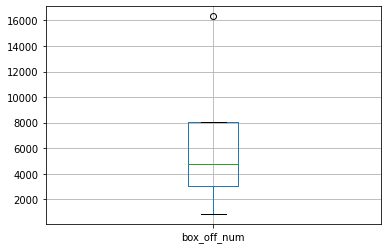

In [ ]:
# 뮤지컬 관객수 이상치 확인 (15만)
gr = "뮤지컬"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

Q3 :  112390.5
총 개수 : 2
Q3 이상 개수 : 1
Q3 이하 개수 : 1


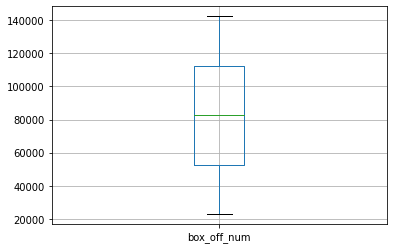

In [ ]:
# 서스펜스 관객수 이상치 확인
gr = "서스펜스"

Q3 = train[train['genre']==gr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['genre']==gr)]))
print("Q3 이상 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['genre']==gr) & (train['box_off_num'] <= Q3)]))
train[train['genre']==gr].boxplot(column=['box_off_num'])

In [ ]:
# 장르별 관객수 평균(이상치 제거 X)
a = train.groupby('genre')['box_off_num'].describe().sort_values(by=['count'],ascending=False)
aa = {
    "장르" : [],
    "평균" : []
}
for i in range(len(a)) :
  name_ = a.iloc[i].name
  value_ = a.iloc[i]['mean']/a.iloc[i]['count']
  aa['장르'].append(name_)
  aa['평균'].append(value_)

aaa = pd.DataFrame(aa)
aaa.sort_values(by= ["평균"],ascending = False)

,장르,평균
9,SF,137565.05325
6,느와르,83840.55967
5,액션,78713.35969
11,서스펜스,41305.50000
8,미스터리,31032.24567
3,코미디,22526.67925
4,공포,14067.44104
7,애니메이션,8663.17460
2,멜로/로맨스,5461.12870
0,드라마,2831.17553


In [ ]:
# 장르별 관객수 평균(이상치 제거)
train_remove_outlier = train.copy()
idx1 = train_remove_outlier[(train_remove_outlier['genre'] == "드라마") & (train_remove_outlier['box_off_num'] > 8000000)].index
idx2 = train_remove_outlier[(train_remove_outlier['genre'] == "다큐멘터리") & (train_remove_outlier['box_off_num'] > 4000000)].index
idx3 = train_remove_outlier[(train_remove_outlier['genre'] == "멜로/로맨스") & (train_remove_outlier['box_off_num'] > 2500000)].index
idx4 = train_remove_outlier[(train_remove_outlier['genre'] == "코미디") & (train_remove_outlier['box_off_num'] > 7000000)].index
idx5 = train_remove_outlier[(train_remove_outlier['genre'] == "공포") & (train_remove_outlier['box_off_num'] > 5000000)].index
idx6 = train_remove_outlier[(train_remove_outlier['genre'] == "액션") & (train_remove_outlier['box_off_num'] > 10000000)].index
idx7 = train_remove_outlier[(train_remove_outlier['genre'] == "느와르") & (train_remove_outlier['box_off_num'] > 10000000)].index
idx8 = train_remove_outlier[(train_remove_outlier['genre'] == "애니메이션") & (train_remove_outlier['box_off_num'] > 2000000)].index
idx9 = train_remove_outlier[(train_remove_outlier['genre'] == "미스터리") & (train_remove_outlier['box_off_num'] > 5000000)].index
idx10 = train_remove_outlier[(train_remove_outlier['genre'] == "SF") & (train_remove_outlier['box_off_num'] > 8000000)].index
idx11 = train_remove_outlier[(train_remove_outlier['genre'] == "뮤지컬") & (train_remove_outlier['box_off_num'] > 150000)].index

idx_all = [list(idx1),list(idx2),list(idx3),list(idx4),list(idx5),list(idx6),list(idx7),list(idx8),list(idx9),list(idx10),list(idx11)]
idx_all2 = []
for i in idx_all :
  for j in i :
    if j not in idx_all2 :
      idx_all2.append(j)

train_remove_outlier = train_remove_outlier.drop(
     index = idx_all2
)

b = train_remove_outlier.groupby('genre')['box_off_num'].describe().sort_values(by=['count'],ascending=False)
bb = {
    "장르" : [],
    "평균" : []
}
for i in range(len(b)) :
  name_ = b.iloc[i].name
  value_ = b.iloc[i]['mean']/b.iloc[i]['count']
  bb['장르'].append(name_)
  bb['평균'].append(value_)

bbb = pd.DataFrame(bb)
bbb.sort_values(by= ["평균"],ascending = False)

,장르,평균
6,느와르,71206.99260
5,액션,67221.68861
9,SF,43239.13223
11,서스펜스,41305.50000
8,미스터리,13770.58594
3,코미디,13741.02680
4,공포,11428.23319
7,애니메이션,4044.18000
2,멜로/로맨스,3436.60920
0,드라마,1936.34178


In [ ]:
idx_outlier_genre = idx_all2
idx_outlier_genre

[101,
 122,
 372,
 460,
 267,
 34,
 297,
 393,
 507,
 16,
 476,
 530,
 561,
 498,
 362,
 381,
 326,
 496,
 505]

- 이상치 제거 후  

|index|장르|평균|
|---|---|---|
|6|느와르|71206\.9926035503|
|5|액션|67221\.68861454047|
|9|SF|43239\.132231404954|
|11|서스펜스|41305\.5|
|8|미스터리|13770\.5859375|
|3|코미디|13741\.0268|
|4|공포|11428\.233194527067|
|7|애니메이션|4044\.1800000000003|
|2|멜로/로맨스|3436\.609203798393|
|0|드라마|1936\.341778334643|
|10|뮤지컬|1325\.4|
|1|다큐멘터리|170\.7054584120983|

- 이상치 제거 X

|index|장르|평균|
|---|---|---|
|9|SF|137565\.05325443787|
|6|느와르|83840\.55967078189|
|5|액션|78713\.35969387754|
|11|서스펜스|41305\.5|
|8|미스터리|31032\.245674740483|
|3|코미디|22526\.67924528302|
|4|공포|14067\.4410430839|
|7|애니메이션|8663\.174603174602|
|2|멜로/로맨스|5461\.128698224852|
|0|드라마|2831\.175528756577|
|10|뮤지컬|1325\.4|
|1|다큐멘터리|722\.2823447797434|

## release_time : 개봉일

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['release_time'].isna().any())
print("test 결측치 존재 :",test['release_time'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
train['release_time'].value_counts()

2015-10-22    6
2013-11-28    6
2015-08-13    6
2010-09-16    6
2010-09-30    5
             ..
2013-05-09    1
2013-12-11    1
2013-12-19    1
2015-06-25    1
2013-01-30    1
Name: release_time, Length: 330, dtype: int64

In [ ]:
# 년도별, 월별 나누기
train['년도별'] = train['release_time'].apply(lambda x : x[:4])
train['월별'] = train['release_time'].apply(lambda x : x[5:7])
train.head(1)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,롯데엔터테인먼트,2012,11


In [ ]:
# 년도별 describe()
train.groupby('년도별')['box_off_num'].describe()

,count,mean,std,min,25%,50%,75%,max
년도별,,,,,,,,
2010,90.00000,541658.16667,1031994.78344,46.00000,1800.75000,28375.50000,590898.25000,6178665.00000
2011,80.00000,628867.13750,1402956.81271,36.00000,1170.75000,18904.00000,679323.00000,7482180.00000
2012,88.00000,945725.19318,2177285.34786,10.00000,1072.00000,20688.00000,961833.25000,12983841.00000
2013,95.00000,1007357.81053,2476602.63400,205.00000,2182.00000,14188.00000,619562.50000,12811435.00000
2014,127.00000,593884.49606,1818290.02210,1.00000,1590.50000,7721.00000,218307.00000,14262766.00000
2015,120.00000,595869.20833,1655490.86500,8.00000,854.25000,7987.50000,384538.50000,12706663.00000


In [ ]:
# 년도별 총관객수
print("2010년 영화 관객수 :",train[train['년도별'] == "2010"]['box_off_num'].sum())
print("2011년 영화 관객수 :",train[train['년도별'] == "2011"]['box_off_num'].sum())
print("2012년 영화 관객수 :",train[train['년도별'] == "2012"]['box_off_num'].sum())
print("2013년 영화 관객수 :",train[train['년도별'] == "2013"]['box_off_num'].sum())
print("2014년 영화 관객수 :",train[train['년도별'] == "2014"]['box_off_num'].sum())
print("2015년 영화 관객수 :",train[train['년도별'] == "2015"]['box_off_num'].sum())

2010년 영화 관객수 : 48749235
2011년 영화 관객수 : 50309371
2012년 영화 관객수 : 83223817
2013년 영화 관객수 : 95698992
2014년 영화 관객수 : 75423331
2015년 영화 관객수 : 71504305


- 2013년에 총 관객수가 제일 많음(95,698,992)

In [ ]:
# 2013년도 영화 TOP 5 
train[train['년도별'] == "2013"].sort_values(by=['box_off_num'],ascending=False).head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.50000,2,300,8,12811435,NEW,2013,01
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,NaN,0,311,5,11374879,NEW,2013,12
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,NaN,0,67,10,9350351,CJ 엔터테인먼트,2013,08
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1242778.00000,2,298,6,9135806,쇼박스,2013,09
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532,CJ 엔터테인먼트,2013,01


In [ ]:
# 월별 describe()
train.groupby('월별')['box_off_num'].describe()

,count,mean,std,min,25%,50%,75%,max
월별,,,,,,,,
01,39.00000,1365930.56410,2692591.01868,148.00000,3087.00000,283449.00000,1350641.50000,12811435.00000
02,31.00000,663025.19355,1161149.71006,166.00000,2740.00000,10203.00000,815575.50000,4720050.00000
03,52.00000,273887.36538,738566.57180,65.00000,945.25000,4110.50000,95480.25000,4113446.00000
04,47.00000,258166.70213,683593.82317,54.00000,1681.00000,7956.00000,96965.00000,3849696.00000
05,57.00000,575685.24561,1319350.90812,1.00000,1008.00000,7448.00000,334323.00000,7453715.00000
06,29.00000,512286.48276,1378697.09228,79.00000,2729.00000,18343.00000,383582.00000,6959083.00000
07,49.00000,1113807.24490,2750318.72293,172.00000,1002.00000,9301.00000,696382.00000,12983841.00000
08,55.00000,1029161.67273,2219550.58287,42.00000,1240.00000,16248.00000,780940.00000,9350351.00000
09,60.00000,731528.63333,2056166.50808,2.00000,923.00000,14931.00000,487574.50000,12323595.00000


In [ ]:
train['월별'].value_counts().index

Index(['11', '10', '09', '05', '08', '03', '07', '12', '04', '01', '02', '06'], dtype='object')

In [ ]:
# 월별 총관객수
a = {
    '월' : [],
    '총관객수' : []
}
for i in train['월별'].value_counts().index:
  a['월'].append(i)
  a['총관객수'].append(train[train['월별'] == i]['box_off_num'].sum())

aa = pd.DataFrame(a)
aa.sort_values(by=['총관객수'],ascending=False)

,월,총관객수
7,12,63124139
4,08,56603892
6,07,54576555
9,01,53271292
2,09,43891718
0,11,35687080
3,05,32814059
1,10,23154249
10,02,20553781
11,06,14856308


## time : 상영시간(분)

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['time'].isna().any())
print("test 결측치 존재 :",test['time'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
train['time'].sort_values()

545     45
319     60
428     61
574     61
194     62
      ... 
422    153
477    156
209    163
438    166
377    180
Name: time, Length: 600, dtype: int64

In [ ]:
# 10분 단위로 나누기
bins = list(range(40,191,10))
bins_label = [str(x)+"분~"+str(x+10)+"분" for x in bins]
train['time_cate'] = pd.cut(
    train['time'], 
    bins, 
    right=False,  # 특정 값 "미만"으로 구역을 나눠야하기 때문
    labels=bins_label[:-1], # 최소 1개 값이 있어야해서 맨뒤 라벨 제거
)
train['time_cate'].to_frame()

,time_cate
0,90분~100분
1,130분~140분
2,120분~130분
3,100분~110분
4,100분~110분
...,...
595,110분~120분
596,120분~130분
597,90분~100분
598,100분~110분


In [ ]:
train['time_cate'].value_counts()

90분~100분     135
100분~110분    113
80분~90분       97
110분~120분     96
120분~130분     61
70분~80분       49
130분~140분     22
60분~70분       16
140분~150분      5
150분~160분      2
160분~170분      2
40분~50분        1
180분~190분      1
50분~60분        0
170분~180분      0
Name: time_cate, dtype: int64

- 50 ~ 60분 , 170 ~ 180분 왜 존재할까? -> 결측치 확인하면 없음

In [ ]:
train.groupby('time_cate')['box_off_num'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
time_cate,,,,,,,,
90분~100분,135.00000,81736.51111,287859.27020,2.00000,924.50000,2475.00000,15613.50000,2202788.00000
100분~110분,113.00000,427670.53097,973185.94237,136.00000,2972.00000,33902.00000,346483.00000,5604106.00000
80분~90분,97.00000,81900.90722,497157.36810,1.00000,712.00000,2117.00000,12950.00000,4802169.00000
110분~120분,96.00000,1036821.52083,1241248.70147,385.00000,75370.25000,570088.50000,1505508.75000,6178665.00000
120분~130분,61.00000,2511769.14754,3409674.05919,74.00000,210970.00000,986287.00000,2971475.00000,14262766.00000
70분~80분,49.00000,7680.26531,12654.78565,8.00000,368.00000,1068.00000,11666.00000,50308.00000
130분~140분,22.00000,4028161.40909,4402935.71613,389.00000,734008.00000,2030062.50000,6484388.25000,12983841.00000
60분~70분,16.00000,31550.00000,110954.56436,65.00000,179.00000,582.50000,2477.50000,446054.00000
140분~150분,5.00000,1180485.40000,1765023.33227,485.00000,5992.00000,63517.00000,1817069.00000,4015364.00000


In [ ]:
# 상영시간 별 관객수 평균(이상치 제거 X)
a = train.groupby('time_cate')['box_off_num'].describe().sort_values(by=['count'],ascending=False)
aa = {
    "시간" : [],
    "평균" : [],
    '개수' : [],
}
for i in range(len(a)) :
  name_ = a.iloc[i].name
  value_ = a.iloc[i]['mean']/a.iloc[i]['count']
  count_ = a.iloc[i]['count']
  aa['시간'].append(name_)
  aa['평균'].append(value_)
  aa['개수'].append(count_)

aaa = pd.DataFrame(aa)
aaa.sort_values(by= ["평균"],ascending = False)

,시간,평균,개수
12,180분~190분,2084844.00000,1.00000
9,150분~160분,1001274.25000,2.00000
10,160분~170분,838677.25000,2.00000
8,140분~150분,236097.08000,5.00000
6,130분~140분,183098.24587,22.00000
4,120분~130분,41176.54340,61.00000
3,110분~120분,10800.22418,96.00000
1,100분~110분,3784.69496,113.00000
11,40분~50분,2919.00000,1.00000
7,60분~70분,1971.87500,16.00000


In [ ]:
# TOP4 상영시간은 140분 이상인 영화들
train[train['time'] > 140]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별,time_cate
111,여행,스폰지,드라마,2010-05-20,148,전체 관람가,배창호,NaN,0,61,6,485,스폰지,2010,05,140분~150분
209,이끼,시네마서비스,드라마,2010-07-14,163,청소년 관람불가,강우석,NaN,0,353,8,3350311,시네마서비스,2010,07,160분~170분
365,경주,인벤트 디,드라마,2014-06-12,145,15세 관람가,장률,NaN,0,85,4,63517,인벤트 디,2014,06,140분~150분
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.00000,3,382,3,2084844,쇼박스,2015,12,180분~190분
409,타짜-신의 손,롯데엔터테인먼트,드라마,2014-09-03,147,청소년 관람불가,강형철,7838528.50000,2,583,4,4015364,롯데엔터테인먼트,2014,09,140분~150분
422,전설의 주먹,CJ 엔터테인먼트,액션,2013-04-10,153,청소년 관람불가,강우석,844821.00000,3,335,6,1744585,CJ 엔터테인먼트,2013,04,150분~160분
438,산다,리틀빅픽처스,드라마,2015-05-21,166,청소년 관람불가,박정범,NaN,0,180,4,4398,리틀빅픽처스,2015,05,160분~170분
442,악마를 보았다,(주)쇼박스,느와르,2010-08-12,144,청소년 관람불가,김지운,NaN,0,582,2,1817069,쇼박스,2010,08,140분~150분
477,황해,(주)쇼박스,느와르,2010-12-22,156,청소년 관람불가,나홍진,5046096.00000,1,683,3,2260512,쇼박스,2010,12,150분~160분


In [ ]:
# 상관계수
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.00000,0.26468,0.30673,0.62321,0.11415,0.44145
dir_prev_bfnum,0.26468,1.00000,0.13182,0.32352,0.08382,0.28318
dir_prev_num,0.30673,0.13182,1.00000,0.45071,0.01401,0.25967
num_staff,0.62321,0.32352,0.45071,1.00000,0.07787,0.54426
num_actor,0.11415,0.08382,0.01401,0.07787,1.00000,0.11118
box_off_num,0.44145,0.28318,0.25967,0.54426,0.11118,1.00000


- time 과 num_staff 상관계수 : 0.62

In [ ]:
train.groupby('time_cate').describe()['num_staff']

,count,mean,std,min,25%,50%,75%,max
time_cate,,,,,,,,
40분~50분,1.00000,2.00000,NaN,2.00000,2.00000,2.00000,2.00000,2.00000
50분~60분,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60분~70분,16.00000,12.43750,13.44603,1.00000,2.00000,9.00000,17.00000,52.00000
70분~80분,49.00000,30.91837,47.51747,0.00000,3.00000,14.00000,35.00000,220.00000
80분~90분,97.00000,48.38144,67.84855,0.00000,3.00000,21.00000,56.00000,365.00000
90분~100분,135.00000,72.26667,81.16615,0.00000,12.50000,49.00000,95.50000,359.00000
100분~110분,113.00000,161.05310,129.23897,0.00000,37.00000,132.00000,255.00000,519.00000
110분~120분,96.00000,277.50000,146.29933,6.00000,156.75000,289.00000,372.00000,642.00000
120분~130분,61.00000,294.00000,199.34718,2.00000,95.00000,303.00000,438.00000,869.00000


## screening_rat : 상영등급

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['screening_rat'].isna().any())
print("test 결측치 존재 :",test['screening_rat'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [ ]:
test['screening_rat'].value_counts()

청소년 관람불가    93
15세 관람가     73
12세 관람가     40
전체 관람가      37
Name: screening_rat, dtype: int64

In [ ]:
train.groupby('screening_rat')['box_off_num'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
screening_rat,,,,,,,,
청소년 관람불가,204.00000,364181.32843,997014.55659,1.00000,812.00000,3008.50000,95404.25000,7072501.00000
15세 관람가,202.00000,1247518.64356,2487687.97733,36.00000,3048.00000,242381.00000,1213018.50000,12983841.00000
12세 관람가,102.00000,844980.90196,2021396.47627,90.00000,1943.50000,19323.00000,808472.75000,14262766.00000
전체 관람가,92.00000,135100.45652,556793.33311,65.00000,1210.00000,8325.00000,35647.75000,4802169.00000


In [ ]:
# 상영등급 별 관객수 평균(이상치 제거 X)
a = train.groupby('screening_rat')['box_off_num'].describe().sort_values(by=['count'],ascending=False)
aa = {
    "시간" : [],
    "평균" : [],
    '개수' : [],
}
for i in range(len(a)) :
  name_ = a.iloc[i].name
  value_ = a.iloc[i]['mean'] / a.iloc[i]['count']
  count_ = a.iloc[i]['count']
  aa['시간'].append(name_)
  aa['평균'].append(value_)
  aa['개수'].append(count_)

aaa = pd.DataFrame(aa)
aaa.sort_values(by= ["평균"],ascending = False)

,시간,평균,개수
2,12세 관람가,8284.12649,102.00000
1,15세 관람가,6175.83487,202.00000
0,청소년 관람불가,1785.20259,204.00000
3,전체 관람가,1468.48322,92.00000


Q3 :  808472.75
총 개수 : 102
Q3 이상 개수 : 26
Q3 이하 개수 : 76


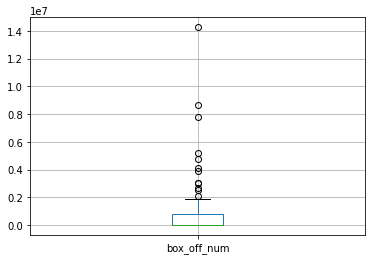

In [ ]:
# 12세 관람가 관객수 이상치 확인 ( 800 만 )
sr = "12세 관람가"

Q3 = train[train['screening_rat']==sr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['screening_rat']==sr)]))
print("Q3 이상 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] <= Q3)]))
train[train['screening_rat']==sr].boxplot(column=['box_off_num'])

Q3 :  1213018.5
총 개수 : 202
Q3 이상 개수 : 51
Q3 이하 개수 : 151


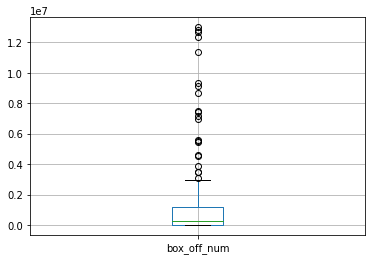

In [ ]:
# 15세 관람가 관객수 이상치 확인 ( 1000만 )
sr = "15세 관람가"

Q3 = train[train['screening_rat']==sr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['screening_rat']==sr)]))
print("Q3 이상 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] <= Q3)]))
train[train['screening_rat']==sr].boxplot(column=['box_off_num'])

Q3 :  35647.75
총 개수 : 92
Q3 이상 개수 : 23
Q3 이하 개수 : 69


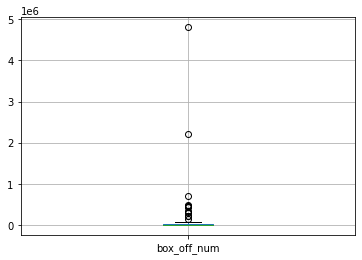

In [ ]:
# 전체 관람가 관객수 이상치 확인 ( 200 만 )
sr = "전체 관람가"

Q3 = train[train['screening_rat']==sr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['screening_rat']==sr)]))
print("Q3 이상 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] <= Q3)]))
train[train['screening_rat']==sr].boxplot(column=['box_off_num'])

Q3 :  95404.25
총 개수 : 204
Q3 이상 개수 : 51
Q3 이하 개수 : 153


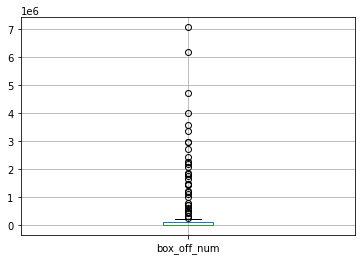

In [ ]:
# 청소년 관람불가 관객수 이상치 확인 ( 500만 )
sr = "청소년 관람불가"

Q3 = train[train['screening_rat']==sr]['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(train[(train['screening_rat']==sr)]))
print("Q3 이상 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(train[(train['screening_rat']==sr) & (train['box_off_num'] <= Q3)]))
train[train['screening_rat']==sr].boxplot(column=['box_off_num'])

In [ ]:
# 상영등급 별 관객수 평균(이상치 제거)
train_remove_screening_rat = train.copy()
idx1 = train_remove_screening_rat[(train_remove_screening_rat['screening_rat'] == "12세 관람가") & (train_remove_screening_rat['box_off_num'] > 8000000)].index
idx2 = train_remove_screening_rat[(train_remove_screening_rat['screening_rat'] == "15세 관람가") & (train_remove_screening_rat['box_off_num'] > 10000000)].index
idx3 = train_remove_screening_rat[(train_remove_screening_rat['screening_rat'] == "전체 관람가") & (train_remove_screening_rat['box_off_num'] > 2000000)].index
idx4 = train_remove_screening_rat[(train_remove_screening_rat['screening_rat'] == "청소년 관람불가") & (train_remove_screening_rat['box_off_num'] > 5000000)].index

idx_all = [list(idx1),list(idx2),list(idx3),list(idx4)]
idx_all2 = []
for i in idx_all :
  for j in i :
    if j not in idx_all2 :
      idx_all2.append(j)

train_remove_screening_rat = train_remove_screening_rat.drop(
     index = idx_all2
)

b = train_remove_screening_rat.groupby('screening_rat')['box_off_num'].describe().sort_values(by=['count'],ascending=False)
bb = {
    "장르" : [],
    "평균" : [],
    "개수" : [],
}
for i in range(len(b)) :
  name_ = b.iloc[i].name
  value_ = b.iloc[i]['mean']/b.iloc[i]['count']
  count_ = b.iloc[i]['count']
  bb['장르'].append(name_)
  bb['평균'].append(value_)
  bb['개수'].append(count_)

bbb = pd.DataFrame(bb)
bbb.sort_values(by= ["평균"],ascending = False)

,장르,평균,개수
2,12세 관람가,6325.90780,100.00000
1,15세 관람가,4890.57572,197.00000
0,청소년 관람불가,1495.97650,202.00000
3,전체 관람가,669.66481,90.00000


In [ ]:
idx_outlier_screening_rat = idx_all2
idx_outlier_screening_rat

[372, 505, 122, 362, 460, 498, 530, 267, 381, 1, 74]

- 이상치 제거 전 

|index|시간|평균|개수|
|---|---|---|---|
|2|12세 관람가|8284\.126489811611|102\.0|
|1|15세 관람가|6175\.834869130477|202\.0|
|0|청소년 관람불가|1785\.2025903498654|204\.0|
|3|전체 관람가|1468\.483223062382|92\.0|

- 이상치 제거 후

|index|장르|평균|개수|
|---|---|---|---|
|2|12세 관람가|6325\.9078|100\.0|
|1|15세 관람가|4890\.575716972867|197\.0|
|0|청소년 관람불가|1495\.9764974022155|202\.0|
|3|전체 관람가|669\.6648148148148|90\.0|

## director : 감독이름

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['director'].isna().any())
print("test 결측치 존재 :",test['director'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
train['director'].value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

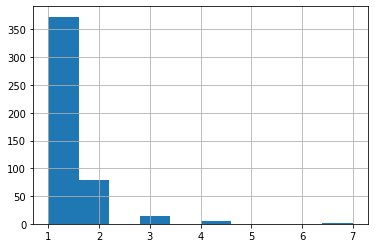

In [ ]:
train['director'].value_counts().hist()

In [ ]:
up_1_dir = list(set(list(train['director'].value_counts()[(train['director'].value_counts() > 1) == True ].index)))
down_1_dir = list(set(list(train['director'].value_counts()[(train['director'].value_counts() == 1) == True ].index)))
print(len(up_1_dir), len(down_1_dir))

99 373


In [ ]:
### 작품을 최소 2개 이상 낸 감독이 관객수가 많을까? 
# 2개 이상 낸 감독
train[(train['director'].isin(up_1_dir))].describe()['box_off_num'].to_frame()

,box_off_num
count,227.00000
mean,924178.51982
std,2141895.41521
min,65.00000
25%,1587.50000
50%,27083.00000
75%,869085.50000
max,12983841.00000


In [ ]:
### 작품을 최소 2개 이상 낸 감독이 관객수가 많을까? 
# 2개 이하 낸 감독
train[(train['director'].isin(down_1_dir))].describe()['box_off_num'].to_frame()

,box_off_num
count,373.00000
mean,576730.63539
std,1596166.45147
min,1.00000
25%,1124.00000
50%,7908.00000
75%,386074.00000
max,14262766.00000


Q3 :  869085.5
총 개수 : 227
Q3 이상 개수 : 57
Q3 이하 개수 : 170


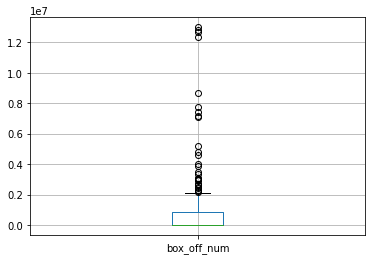

In [ ]:
### 작품을 최소 2개 이상 낸 감독이 관객수가 많을까? 
# 영화 2개 이상 낸 감독 관객수 이상치 확인 ( 1000 만 )
t = train[(train['director'].isin(up_1_dir))]

Q3 = t['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(t))
print("Q3 이상 개수 :",len(t[(t['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(t[(t['box_off_num'] <= Q3)]))
t.boxplot(column=['box_off_num'])

Q3 :  386074.0
총 개수 : 373
Q3 이상 개수 : 93
Q3 이하 개수 : 280


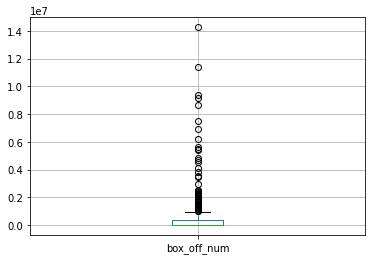

In [ ]:
### 작품을 최소 2개 이상 낸 감독이 관객수가 많을까? 
# 영화 2개 이하 낸 감독 관객수 이상치 확인 ( 1000 만 )
t = train[(train['director'].isin(down_1_dir))]

Q3 = t['box_off_num'].quantile(q=0.75)
print("Q3 : ", Q3)
print("총 개수 :", len(t))
print("Q3 이상 개수 :",len(t[(t['box_off_num'] > Q3)]))
print("Q3 이하 개수 :",len(t[(t['box_off_num'] <= Q3)]))
t.boxplot(column=['box_off_num'])

In [ ]:
# 영화 2개 이상 감독 별 관객수 평균(이상치 제거)
tt_u = train[(train['director'].isin(up_1_dir))]

tt_u_2 = tt_u[tt_u['box_off_num'] < 10000000]

tt_u_2.describe()['box_off_num'].to_frame()

,box_off_num
count,223.00000
mean,712838.52018
std,1457116.18498
min,65.00000
25%,1562.50000
50%,22525.00000
75%,802764.50000
max,8666208.00000


In [ ]:
# 영화 2개 이상,이하 감독 별 관객수 평균(이상치 제거)
tt_d = train[(train['director'].isin(down_1_dir))]

tt_d_2 = tt_d[tt_d['box_off_num'] < 10000000]

tt_d_2.describe()['box_off_num'].to_frame()

,box_off_num
count,371.00000
mean,510735.53100
std,1317490.04038
min,1.00000
25%,1102.50000
50%,7721.00000
75%,358952.50000
max,9350351.00000


In [ ]:
down_1_dir

['김성균',
 '조운',
 '이수정',
 '김성호',
 '고구마',
 '서동일',
 '한소준',
 '장태령',
 '임유철',
 '이현철',
 '장윤현',
 '권중목',
 '백동훈',
 '장희철',
 '정흠문',
 '조세영',
 '주호성',
 '김진열',
 '강훈',
 '김지용',
 '남택수',
 '지율스님',
 '노영석',
 '구모',
 '박상현',
 '한승훈',
 '홍원찬',
 '오창민',
 '임경수',
 '박미선',
 '신정균',
 '김대승',
 '장훈',
 '이조훈',
 '홍재희',
 '임상윤',
 '김정욱',
 '문제대',
 '이대희',
 '김덕수',
 '김용균',
 '강성옥',
 '전태윤',
 '경순',
 '배광수',
 '이장호',
 '김대창',
 '성지혜',
 '신성섭',
 '조치언',
 '윤제균',
 '정윤수',
 '김광태',
 '김정환',
 '김선아',
 '유원상',
 '이덕희',
 '이항배',
 '김정호',
 '심성보',
 '민환기',
 '조동오',
 '김회근',
 '황욱',
 '김대현',
 '강석필',
 '유정환',
 '오인천',
 '양영희',
 '알버트 신',
 '최호',
 '이창동',
 '한창근',
 '봉만대',
 '한지원',
 '김민석',
 '권오광',
 '한종훈',
 '김경만',
 '한상민',
 '전형준',
 '박석영',
 '이지형',
 '김철민',
 '피터 레페니오티스',
 '김지운',
 '김익로',
 '최원섭',
 '배성상',
 '노효두',
 '타케 마사하루',
 '임상준',
 '도창훈',
 '백연아',
 '김진홍',
 '안도 마사히로',
 '문인수',
 '김관철',
 '민백두',
 '박철관',
 '이현승',
 '정하린',
 '성시흡',
 '이로이',
 '임찬상',
 '임범',
 '한동욱',
 '정영헌',
 '김선',
 '윤종찬',
 '이홍재',
 '백승화',
 '김종철',
 '한승룡',
 '신정원',
 '김대성',
 '이종현',
 '이지승',
 '김경묵',
 '김재환',
 '박문칠',
 '조의석',
 '김성홍',
 '민용근',


- 이상치 제거 (전) , 감독 2회 이상 

|index|box\_off\_num|
|---|---|
|count|227\.0|
|mean|924178\.5198237885|
|std|2141895\.4152073814|
|min|65\.0|
|25%|1587\.5|
|50%|27083\.0|
|75%|869085\.5|
|max|12983841\.0|

- 이상치 제거 (후) , 감독 2회 이상

|index|box\_off\_num|
|---|---|
|count|223\.0|
|mean|712838\.5201793722|
|std|1457116\.1849779396|
|min|65\.0|
|25%|1562\.5|
|50%|22525\.0|
|75%|802764\.5|
|max|8666208\.0|

- 이상치 제거 (전) , 감독 2회 이하

|index|box\_off\_num|
|---|---|
|count|373\.0|
|mean|576730\.63538874|
|std|1596166\.4514696419|
|min|1\.0|
|25%|1124\.0|
|50%|7908\.0|
|75%|386074\.0|
|max|14262766\.0|

- 이상치 제거 (후) , 감독 2회 이하

|index|box\_off\_num|
|---|---|
|count|371\.0|
|mean|510735\.5309973046|
|std|1317490\.0403847957|
|min|1\.0|
|25%|1102\.5|
|50%|7721\.0|
|75%|358952\.5|
|max|9350351\.0|

- (이상치 제거 후) 2회 이상 `712,838` 2회 이하 `510,735`
- 수치로 보면 `경력자가 높음!`

In [ ]:
# 1000만 영화 감독의 다른 영화
over_1000_directors = train[train['box_off_num'] > 10000000]['director'].values
over_1000_directors # 양우석, 윤제균, 추창민, 최동훈, 이환경

train[
    (train['director'] == "양우석") | (train['director'] == "윤제균") |\
      (train['director'] == "추창민") |(train['director'] == "최동훈") |\
      (train['director'] == "이환경") 
    ].sort_values(by=['box_off_num'],ascending=False)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별,time_cate
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766,CJ 엔터테인먼트,2014,12,120분~130분
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2564691.66667,3,462,10,12983841,쇼박스,2012,07,130분~140분
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.50000,2,300,8,12811435,NEW,2013,01,120분~130분
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5169479.00000,4,628,3,12706663,쇼박스,2015,07,130분~140분
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1552541.00000,2,402,3,12323595,CJ 엔터테인먼트,2012,09,130분~140분
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,NaN,0,311,5,11374879,NEW,2013,12,120분~130분
244,그대를 사랑합니다,(주)NEW,드라마,2011-02-17,118,15세 관람가,추창민,1552541.00000,2,304,4,1649407,NEW,2011,02,110분~120분
157,챔프,(주)쇼박스,드라마,2011-09-07,133,12세 관람가,이환경,819049.50000,2,92,4,535657,쇼박스,2011,09,130분~140분


- 추창민 : "그대를 사랑합니다" 160만
- 이환경 : "챔프 50만

## dir_prev_bfnum : 전 제작에 참여한 영화에서의 평균 관객수

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['dir_prev_bfnum'].isna().any())
print("test 결측치 존재 :",test['dir_prev_bfnum'].isna().any())

train 결측치 존재 : True
test 결측치 존재 : True


In [ ]:
train['dir_prev_bfnum'].isna().value_counts()

True     330
False    270
Name: dir_prev_bfnum, dtype: int64

In [ ]:
# train 결측치 비율 
330 / 600 

0.55

In [ ]:
train[train['dir_prev_bfnum'].isna() == True]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별,time_cate
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,롯데엔터테인먼트,2012,11,90분~100분
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526,백두대간,2013,05,100분~110분
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778,유니버설픽쳐스인터내셔널코리아,2014,09,120분~130분
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868,두타연,2012,03,90분~100분
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745,케이알씨지,2015,07,80분~90분
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132,퍼스트런,2013,09,90분~100분
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958,마운틴픽처스,2014,03,90분~100분
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,마운틴픽처스,2010,09,90분~100분
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,CJ 엔터테인먼트,2015,05,100분~110분


In [ ]:
# 전 평균 관객수 데이터가 없는 감독 들 
dd = list(set(list(train[train['dir_prev_bfnum'].isna() == True]['director'].values)))

In [ ]:
# 전 평균 관객수 데이터가 없는 감독 들 중에서 영화를 찍어본 감독 들
dd2 = train[(train['dir_prev_bfnum'].isna() == False) & (train['director'].isin(dd) == True)]['director']
dd2

1      우민호
23     권칠인
41     민규동
55     권칠인
59     곽경택
63     우민호
70     진승현
138    김태용
164    홍상수
189    신수원
245    임성구
261     류훈
263    윤여창
289    신현원
377    우민호
394     손석
422    강우석
430    김봉은
455    김정훈
463     장진
464    김상철
544    김동원
578    안재훈
Name: director, dtype: object

In [ ]:
train[(train['director'] == "우민호")]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별,time_cate
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,쇼박스,2015,11,130분~140분
58,파괴된 사나이,시너지,공포,2010-07-01,114,청소년 관람불가,우민호,NaN,0,290,5,1012310,시너지,2010,07,110분~120분
63,간첩,롯데엔터테인먼트,드라마,2012-09-20,115,15세 관람가,우민호,1012310.00000,1,372,5,1310895,롯데엔터테인먼트,2012,09,110분~120분
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.00000,3,382,3,2084844,쇼박스,2015,12,180분~190분


In [ ]:
# dir_prev_bfnum 가 결측치면 , dir_prev_num은 전부 0 이다
train[(train['dir_prev_bfnum'].isna() == True) & (train['dir_prev_num'] != 0)]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별,time_cate


In [ ]:
# dir_prev_bfnum2 결측치를 0으로 대입
#train['dir_prev_bfnum2'] = train['dir_prev_bfnum'].fillna(0)

## dir_prev_num : 전 제작에 참여한 영화의 개수

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['dir_prev_num'].isna().any())
print("test 결측치 존재 :",test['dir_prev_num'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
# 종류
train['dir_prev_num'].value_counts()

0    330
1    113
2     86
3     47
4     20
5      4
Name: dir_prev_num, dtype: int64

In [ ]:
### 전 제작에 참여한 영화의 개수가 많을수록 , 평균 관객수가 많을까?
print("참여개수가 1개 이하(이상치제거X) :", train[(train['dir_prev_num']== 0)]['box_off_num'].mean())
print("참여개수가 1개 이상(이상치제거X) :", train[(train['dir_prev_num']> 0)]['box_off_num'].mean())

참여개수가 1개 이하(이상치제거X) : 349204.2787878788
참여개수가 1개 이상(이상치제거X) : 1146931.9962962964


- 영화 제작이 처음인 감독의 평균 관객수가 낮음을 알 수 있다

## num_staff : 스텝수

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['num_staff'].isna().any())
print("test 결측치 존재 :",test['num_staff'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
train['num_staff'].value_counts()

0      32
2      15
1      15
3      12
17     11
       ..
97      1
333     1
600     1
63      1
363     1
Name: num_staff, Length: 296, dtype: int64

In [ ]:
train.corr()['num_staff'].to_frame()

,num_staff
time,0.62321
dir_prev_bfnum,0.32352
dir_prev_num,0.45071
num_staff,1.00000
num_actor,0.07787
box_off_num,0.54426


In [ ]:
# 10분 단위로 나누기
bins = list(range(0,880,10))
bins_label = [str(x)+"명~"+str(x+10)+"명" for x in bins]
train['num_staff_cate'] = pd.cut(
    train['num_staff'], 
    bins, 
    right=False,  # 특정 값 "미만"으로 구역을 나눠야하기 때문
    labels=bins_label[:-1], # 최소 1개 값이 있어야해서 맨뒤 라벨 제거
)
train['num_staff_cate'].to_frame()

,num_staff_cate
0,90명~100명
1,380명~390명
2,340명~350명
3,20명~30명
4,250명~260명
...,...
595,510명~520명
596,280명~290명
597,120명~130명
598,430명~440명


In [ ]:
# 결측치 확인
train[train['num_staff_cate'].isna() == True]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별,time_cate,num_staff_cate


## num_actor : 주연배우수

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['num_actor'].isna().any())
print("test 결측치 존재 :",test['num_actor'].isna().any())

train 결측치 존재 : False
test 결측치 존재 : False


In [ ]:
train['num_actor'].value_counts()

2     154
3     143
4     114
5      58
1      35
6      33
7      16
8      16
0       9
10      8
11      4
9       3
14      2
13      2
25      1
22      1
16      1
Name: num_actor, dtype: int64

In [ ]:
# 주연이 0인 영화는 무엇일까 - 다큐 or 뮤지컬(뮤지컬인데 왜 주연이 없지?)
train[train['num_actor'] == 0 ]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor2,년도별,월별,time_cate,num_staff_cate
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,NaN,0,6,0,652,시네마달,2012,07,110분~120분,0명~10명
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,NaN,0,11,0,10942,시네마달,2013,03,70분~80분,10명~20명
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,NaN,0,13,0,65,골든타이드픽처스,2015,03,60분~70분,10명~20명
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862,패뷸러스,2015,10,80분~90분,0명~10명
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,NaN,0,3,0,1827,인디플러그,2015,05,90분~100분,0명~10명
418,오월愛,상구네 필름,다큐멘터리,2011-05-12,104,전체 관람가,김태일,NaN,0,4,0,4092,상구네 필름,2011,05,100분~110분,0명~10명
425,보라,시네마달,다큐멘터리,2011-11-24,136,전체 관람가,이강현,NaN,0,7,0,389,시네마달,2011,11,130분~140분,0명~10명
437,나쁜 나라,(주)시네마달,다큐멘터리,2015-12-03,120,12세 관람가,김진열,NaN,0,2,0,21576,시네마달,2015,12,120분~130분,0명~10명
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,NaN,0,10,0,79,인터콘미디어,2010,06,60분~70분,10명~20명


In [ ]:
### 주연이 많을수록 관객수가 많을까? - 10일때가 제일 많음
train.groupby('num_actor').describe()['box_off_num']

,count,mean,std,min,25%,50%,75%,max
num_actor,,,,,,,,
0,9.00000,4498.22222,7284.89396,65.00000,389.00000,862.00000,4092.00000,21576.00000
1,35.00000,86102.37143,302951.81846,1.00000,1008.50000,8083.00000,39746.50000,1762733.00000
2,154.00000,598755.09740,1351357.43429,36.00000,1047.00000,9263.50000,601678.25000,8666208.00000
3,143.00000,761740.93007,1907273.61031,8.00000,1187.00000,12486.00000,466981.00000,12706663.00000
4,114.00000,650545.21930,1804144.28888,2.00000,1766.50000,8208.00000,319719.00000,14262766.00000
5,58.00000,979365.20690,2142533.84900,328.00000,2758.00000,20689.50000,973492.00000,11374879.00000
6,33.00000,671745.60606,1694576.78358,71.00000,1806.00000,51207.00000,497880.00000,9135806.00000
7,16.00000,342733.06250,509333.24921,172.00000,642.75000,19177.50000,745954.25000,1475091.00000
8,16.00000,1564732.56250,3199917.25269,188.00000,2548.75000,295863.00000,1895136.25000,12811435.00000


## box_off_num : 관객수

In [ ]:
# 결측치 확인
print("train 결측치 존재 :",train['box_off_num'].isna().any())

train 결측치 존재 : False


In [ ]:
# 100만 단위로 나누기
bins = list(range(0,15000001,1000000))
bins_label = [str(x)[:-4]+"만~"+str(x+1000000)[:-4]+"만" for x in bins]
train['box_off_num_cate'] = pd.cut(
    train['box_off_num'], 
    bins, 
    right=False,  # 특정 값 "미만"으로 구역을 나눠야하기 때문
    labels=bins_label[:-1] # 최소 1개 값이 있어야해서 맨뒤 라벨 제거
)
train['box_off_num_cate'].to_frame()

,box_off_num_cate
0,만~100만
1,700만~800만
2,600만~700만
3,만~100만
4,만~100만
...,...
595,100만~200만
596,100만~200만
597,만~100만
598,200만~300만


In [ ]:
# 100만 단위로 나누기
train.groupby('box_off_num_cate')['box_off_num'].count().to_frame()

,box_off_num
box_off_num_cate,
만~100만,491
100만~200만,49
200만~300만,23
300만~400만,9
400만~500만,7
500만~600만,4
600만~700만,2
700만~800만,5
800만~900만,2


In [ ]:
# 100만 단위 비율
total = train.groupby('box_off_num_cate')['box_off_num'].count().sum()
(train.groupby('box_off_num_cate')['box_off_num'].count() / total *100).to_frame()

,box_off_num
box_off_num_cate,
만~100만,81.83333
100만~200만,8.16667
200만~300만,3.83333
300만~400만,1.50000
400만~500만,1.16667
500만~600만,0.66667
600만~700만,0.33333
700만~800만,0.83333
800만~900만,0.33333


- 200만 이하 비율 : 90 %
- 200만 이상 비율 : 10 %

In [ ]:
# 결측치 없음
train['box_off_num_cate'].isna().any()

False

# 데이터 전처리

In [ ]:
test.loc[224,'time'] = 60 

In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.00000,0.26468,0.30673,0.62321,0.11415,0.44145
dir_prev_bfnum,0.26468,1.00000,0.13182,0.32352,0.08382,0.28318
dir_prev_num,0.30673,0.13182,1.00000,0.45071,0.01401,0.25967
num_staff,0.62321,0.32352,0.45071,1.00000,0.07787,0.54426
num_actor,0.11415,0.08382,0.01401,0.07787,1.00000,0.11118
box_off_num,0.44145,0.28318,0.25967,0.54426,0.11118,1.00000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   title             600 non-null    object  
 1   distributor       600 non-null    object  
 2   genre             600 non-null    object  
 3   release_time      600 non-null    object  
 4   time              600 non-null    int64   
 5   screening_rat     600 non-null    object  
 6   director          600 non-null    object  
 7   dir_prev_bfnum    270 non-null    float64 
 8   dir_prev_num      600 non-null    int64   
 9   num_staff         600 non-null    int64   
 10  num_actor         600 non-null    int64   
 11  box_off_num       600 non-null    int64   
 12  distributor2      600 non-null    object  
 13  년도별               600 non-null    object  
 14  월별                600 non-null    object  
 15  time_cate         600 non-null    category
 16  num_staff_cate    600 non-

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## ~title : 제거~
  - 제거

In [ ]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

## distributor : 배급사 (distributor , distributor2 )
  - 오타 제거 ( distributor_2 )
    - 상위 5개의 배급사를 제외하고 '기타'로처리 ( distributor_21 )
    - 영화가 1개인 배급사는 '기타'로 처리 ( distributor_22 )
    - rank 지정
  - 오타 미제거 ( distributor )
    - 상위 5개의 배급사를 제외하고 '기타'로처리 ( distributor_11 )
    - 영화가 1개인 배급사는 '기타'로 처리 ( distributor_12 )

In [ ]:
### 오타 제거
# distributor_2

# 배급사 같은거 처리
train['distributor2'] = train['distributor'].str.replace("\(주\)","").str.strip()

train['distributor2'] = train['distributor2'].str.replace("드림팩트 엔터테인먼트", "드림팩트엔터테인먼트")
train['distributor2'] = train['distributor2'].str.replace("리틀빅픽쳐스", "리틀빅픽처스")
train['distributor2'] = train['distributor2'].str.replace("마운틴픽쳐스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("마운틴 픽처스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("더픽쳐스/마운틴픽쳐스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("더픽쳐스/마운틴픽처스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("시네마 달", "시네마달")
train['distributor2'] = train['distributor2'].str.replace("마인스 엔터테인먼트", "마인스엔터테인먼트")
train['distributor2'] = train['distributor2'].str.replace("싸이더스FNH", "싸이더스")
train['distributor2'] = train['distributor2'].str.replace("싸이더스 FNH", "싸이더스")
train['distributor2'] = train['distributor2'].str.replace("와이드 릴리즈", "와이드릴리즈")
train['distributor2'] = train['distributor2'].str.replace("영화사 廊", "영화사랑")

# 배급사 같은거 처리
test['distributor2'] = test['distributor'].str.replace("\(주\)","").str.strip()

test['distributor2'] = test['distributor2'].str.replace("드림팩트 엔터테인먼트", "드림팩트엔터테인먼트")
test['distributor2'] = test['distributor2'].str.replace("리틀빅픽쳐스", "리틀빅픽처스")
test['distributor2'] = test['distributor2'].str.replace("마운틴픽쳐스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("마운틴 픽처스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("더픽쳐스/마운틴픽쳐스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("더픽쳐스/마운틴픽처스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("시네마 달", "시네마달")
test['distributor2'] = test['distributor2'].str.replace("마인스 엔터테인먼트", "마인스엔터테인먼트")
test['distributor2'] = test['distributor2'].str.replace("싸이더스FNH", "싸이더스")
test['distributor2'] = test['distributor2'].str.replace("싸이더스 FNH", "싸이더스")
test['distributor2'] = test['distributor2'].str.replace("와이드 릴리즈", "와이드릴리즈")
test['distributor2'] = test['distributor2'].str.replace("영화사 廊", "영화사랑")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
# distributor21
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train['distributor2'].value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor21'] = train['distributor2'].apply(lambda x : func(x))
test['distributor21'] = test['distributor2'].apply(lambda x : func(x))

In [ ]:
# distributor22
# 영화가 1개인 배급사는 '기타'로 처리
distributor_list = train['distributor2'].value_counts()[train['distributor2'].value_counts() == 1]

def func(distributor):
    if distributor in distributor_list:
        return '기타'
    else:
        return distributor

train['distributor22'] = train['distributor2'].apply(lambda x : func(x))
test['distributor22'] = test['distributor2'].apply(lambda x : func(x))

In [ ]:
# distributor11
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train['distributor'].value_counts()[:5]

def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor11'] = train['distributor'].apply(lambda x : func(x))
test['distributor11'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
# distributor12
# 영화가 1개인 배급사는 '기타'로 처리
distributor_list = train['distributor'].value_counts()[train['distributor'].value_counts() == 1]

def func(distributor):
    if distributor in distributor_list:
        return '기타'
    else:
        return distributor

train['distributor12'] = train['distributor'].apply(lambda x : func(x))
test['distributor12'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
tr_nm_rank = train.groupby('distributor2')['box_off_num'].median().reset_index(name = 'num_rank').sort_values(by = 'num_rank')
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,distributor2,num_rank
118,인피니티엔터테인먼트,1
22,고구마공작소,2
58,사람과 사람들,3
105,위드시네마,4
26,나우콘텐츠,5
...,...,...
6,CJ E&M 영화부문,152
92,영구아트무비,153
63,쇼박스미디어플렉스,154
83,아이필름코퍼레이션,155


In [ ]:
# 병합
train = pd.merge(train, tr_nm_rank, how = 'left')
test = pd.merge(test, tr_nm_rank, how = 'left')

## release_time : 개봉일
  - 년, 월 분리하고 기존 컬럼(release_time) 제거
    - 년 사용 
    - 월 사용
    - 년,월 사용


In [ ]:
# 년도별, 월별 나누기
train['년'] = train['release_time'].apply(lambda x : x[:4])
train['월'] = train['release_time'].apply(lambda x : x[5:7])

test['년'] = test['release_time'].apply(lambda x : x[:4])
test['월'] = test['release_time'].apply(lambda x : x[5:7])

train['년월'] = train['release_time'].apply(lambda x : x[:7])
test['년월'] = test['release_time'].apply(lambda x : x[:7])

In [ ]:
# 기존 컬럼 제거
#train = train.drop(['release_time'],axis= 1)
#test = test.drop(['release_time'],axis= 1)

## time : 상영시간(분)
  - 10분 단위로 분리 ( time_cate ) 
  - 그대로

In [ ]:
# 10분 단위
def func_time(x):
    return f'{(x//10)*10}분~{(x//10)*10+10}분'

train['time_cate'] = train['time'].apply(lambda x : func_time(x))
test['time_cate'] = test['time'].apply(lambda x : func_time(x))

In [ ]:
# 30분 단위
def func_time(x):
    return f'{(x//30)*30}분~{(x//30)*30+30}분'

train['time_cate2'] = train['time'].apply(lambda x : func_time(x))
test['time_cate2'] = test['time'].apply(lambda x : func_time(x))

In [ ]:
# 범위
train['time'].value_counts().index.sort_values()

Int64Index([ 45,  60,  61,  62,  63,  65,  66,  67,  69,  70,  71,  72,  73,
             74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
             87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
            100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
            126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 139, 140, 144,
            145, 147, 148, 153, 156, 163, 166, 180],
           dtype='int64')

In [ ]:
# 범위
test['time'].value_counts().index.sort_values()

Int64Index([ 40,  50,  60,  65,  68,  69,  70,  72,  74,  76,  77,  78,  79,
             80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,  92,  93,
             94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
            107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
            120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134,
            135, 137, 144, 198],
           dtype='int64')

In [ ]:
# # 10분 단위로 나누기
# bins = list(range(0,200,10))
# bins_label = [str(x)+"명~"+str(x+10)+"명" for x in bins]
# train['time_cate'] = pd.cut(
#     train['time'], 
#     bins, 
#     right=False,  # 특정 값 "미만"으로 구역을 나눠야하기 때문
#     labels=bins_label[:-1], # 최소 1개 값이 있어야해서 맨뒤 라벨 제거
# )
# test['time_cate'] = pd.cut(
#     test['time'], 
#     bins, 
#     right=False,  # 특정 값 "미만"으로 구역을 나눠야하기 때문
#     labels=bins_label[:-1], # 최소 1개 값이 있어야해서 맨뒤 라벨 제거
# )

In [ ]:
# 이상치 확인
train['time_cate'].value_counts()

90분~100분     135
100분~110분    113
80분~90분       97
110분~120분     96
120분~130분     61
70분~80분       49
130분~140분     22
60분~70분       16
140분~150분      5
160분~170분      2
150분~160분      2
180분~190분      1
40분~50분        1
Name: time_cate, dtype: int64

In [ ]:
test['time_cate'].value_counts()

100분~110분    58
90분~100분     49
110분~120분    42
80분~90분      32
120분~130분    28
70분~80분      17
130분~140분     7
60분~70분       6
190분~200분     1
140분~150분     1
50분~60분       1
40분~50분       1
Name: time_cate, dtype: int64

## director : 감독이름
  - 제거
  - 영화가 1개인 감독은 '기타'로 처리 ( director2 )


In [ ]:
distributor_list = train['director'].value_counts()[(train['director'].value_counts() == 1) == True ].index

def func_director(x):
    if x in distributor_list:
        return '기타'
    else:
        return x

train['director2'] = train['director'].apply(lambda x : func_director(x))
test['director2'] = test['director'].apply(lambda x : func_director(x))

## dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
  - 제거
  - fillna(0) : 결측치 0으로 채우기 ( dir_prev_bfnum2 )


In [ ]:
train['dir_prev_bfnum2'] = train['dir_prev_bfnum'].fillna(0)
test['dir_prev_bfnum2'] = test['dir_prev_bfnum'].fillna(0)

## num_staff : 스텝수
  - 그대로
  - 10단위로 분리 ( num_staff_cate )


In [ ]:
# def func_num_staff(x):
#     return f'{(x//10)*10}명~{(x//10)*10+10}명'

# train['num_staff_cate'] = train['num_staff'].apply(lambda x : func_num_staff(x))
# test['num_staff_cate'] = test['num_staff'].apply(lambda x : func_num_staff(x))

In [ ]:
# 범위
train['num_staff'].value_counts().index.sort_values()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            600, 612, 628, 642, 650, 683, 687, 719, 868, 869],
           dtype='int64', length=296)

In [ ]:
# 범위
test['num_staff'].value_counts().index.sort_values()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            510, 512, 514, 517, 520, 552, 564, 579, 685, 776],
           dtype='int64', length=165)

In [ ]:
# 10명 단위로 나누기
bins = list(range(0,880,10))
bins_label = [str(x)+"명~"+str(x+10)+"명" for x in bins]
train['num_staff_cate'] = pd.cut(
    train['num_staff'], 
    bins, 
    right=False,  # 특정 값 "미만"으로 구역을 나눠야하기 때문
    labels=bins_label[:-1], # 최소 1개 값이 있어야해서 맨뒤 라벨 제거
)
test['num_staff_cate'] = pd.cut(
    test['num_staff'], 
    bins, 
    right=False,  # 특정 값 "미만"으로 구역을 나눠야하기 때문
    labels=bins_label[:-1], # 최소 1개 값이 있어야해서 맨뒤 라벨 제거
)

## dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
  - 그대로


## num_actor : 주연배우수
  - 그대로


## screening_rat : 상영등급
  - 이상치 제거 ( idx_outlier_screening_rat )
  - 그대로 : 이상치 미제거


In [ ]:
# 상영등급 별 관객수 평균(이상치 제거)
idx1 = train[(train['screening_rat'] == "12세 관람가") & (train['box_off_num'] > 8000000)].index
idx2 = train[(train['screening_rat'] == "15세 관람가") & (train['box_off_num'] > 10000000)].index
idx3 = train[(train['screening_rat'] == "전체 관람가") & (train['box_off_num'] > 2000000)].index
idx4 = train[(train['screening_rat'] == "청소년 관람불가") & (train['box_off_num'] > 5000000)].index

idx_all = [list(idx1),list(idx2),list(idx3),list(idx4)]
idx_outlier_screening_rat = []
for i in idx_all :
  for j in i :
    if j not in idx_outlier_screening_rat :
      idx_outlier_screening_rat.append(j)

idx_outlier_screening_rat

[372, 505, 122, 362, 460, 498, 530, 267, 381, 1, 74]

## genre : 장르
  - 이상치 제거( idx_outlier_genre )
  - 그대로 : 이상치 미제거
  - genre rank 지정


In [ ]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬         6627.00000
다큐멘터리      67172.25806
서스펜스       82611.00000
애니메이션     181926.66667
멜로/로맨스    425968.03846
미스터리      527548.17647
공포        590832.52381
드라마       625689.79186
코미디      1193914.00000
SF       1788345.69231
액션       2203974.07143
느와르      2263695.11111
Name: box_off_num, dtype: float64

In [ ]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [ ]:
# 이상치 탐색
idx1 = train[(train['genre'] == "드라마") & (train['box_off_num'] > 8000000)].index
idx2 = train[(train['genre'] == "다큐멘터리") & (train['box_off_num'] > 4000000)].index
idx3 = train[(train['genre'] == "멜로/로맨스") & (train['box_off_num'] > 2500000)].index
idx4 = train[(train['genre'] == "코미디") & (train['box_off_num'] > 7000000)].index
idx5 = train[(train['genre'] == "공포") & (train['box_off_num'] > 5000000)].index
idx6 = train[(train['genre'] == "액션") & (train['box_off_num'] > 10000000)].index
idx7 = train[(train['genre'] == "느와르") & (train['box_off_num'] > 10000000)].index
idx8 = train[(train['genre'] == "애니메이션") & (train['box_off_num'] > 2000000)].index
idx9 = train[(train['genre'] == "미스터리") & (train['box_off_num'] > 5000000)].index
idx10 = train[(train['genre'] == "SF") & (train['box_off_num'] > 8000000)].index
idx11 = train[(train['genre'] == "뮤지컬") & (train['box_off_num'] > 150000)].index

idx_all = [list(idx1),list(idx2),list(idx3),list(idx4),list(idx5),list(idx6),list(idx7),list(idx8),list(idx9),list(idx10),list(idx11)]
idx_outlier_genre = []
for i in idx_all :
  for j in i :
    if j not in idx_outlier_genre :
      idx_outlier_genre.append(j)

idx_outlier_genre

[101,
 122,
 372,
 460,
 267,
 34,
 297,
 393,
 507,
 16,
 476,
 530,
 561,
 498,
 362,
 381,
 326,
 496,
 505]

## box_off_num : 관객수
  - 타겟

# 모델정의 및 학습

## train, test 상태 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   distributor       600 non-null    object  
 1   genre             600 non-null    object  
 2   release_time      600 non-null    object  
 3   time              600 non-null    int64   
 4   screening_rat     600 non-null    object  
 5   director          600 non-null    object  
 6   dir_prev_bfnum    270 non-null    float64 
 7   dir_prev_num      600 non-null    int64   
 8   num_staff         600 non-null    int64   
 9   num_actor         600 non-null    int64   
 10  box_off_num       600 non-null    int64   
 11  distributor2      600 non-null    object  
 12  년도별               600 non-null    object  
 13  월별                600 non-null    object  
 14  time_cate         600 non-null    category
 15  num_staff_cate    600 non-null    category
 16  box_off_num_cate  600 non-

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   distributor      243 non-null    object  
 1   genre            243 non-null    object  
 2   release_time     243 non-null    object  
 3   time             243 non-null    int64   
 4   screening_rat    243 non-null    object  
 5   director         243 non-null    object  
 6   dir_prev_bfnum   107 non-null    float64 
 7   dir_prev_num     243 non-null    int64   
 8   num_staff        243 non-null    int64   
 9   num_actor        243 non-null    int64   
 10  distributor2     243 non-null    object  
 11  distributor21    243 non-null    object  
 12  distributor22    243 non-null    object  
 13  distributor11    243 non-null    object  
 14  distributor12    243 non-null    object  
 15  년                243 non-null    object  
 16  월                243 non-null    object  
 1

## 경우의 수 

- title 
	- 제거
- distributor 
	- 오타 제거 + 상위 5개의 배급사를 제외하고 '기타'로처리 ( distributor_21 )
	- 오타 제거 + 영화가 1개인 배급사는 '기타'로 처리 ( distributor_22 )
	- 오타 미제거 + 상위 5개의 배급사를 제외하고 '기타'로처리 ( distributor_11 )
	- 오타 미제거 + 영화가 1개인 배급사는 '기타'로 처리 ( distributor_12 )
- release_time
	- 그대로
	- 년
	- 월
	- 년, 월
- time
	- 그대로
	- 10분 단위( time_cate )
- director
	- 제거
	- 영화가 1개인 감독은 '기타'로 처리 ( director2 )
- dir_prev_bfnum
	- 제거
	- fillna(0) 채우기 ( dir_prev_bfnum2 )
- num_staff
	- 그대로
	- 10명 단위 ( num_staff_cate )
- dir_prev_num
	- 그대로
	- 제거
- num_actor
	- 그대로
	- 제거
- screening_rat
	- 그대로
	- 제거
	- 이상치 제거 ( idx_outlier_screening_rat )
- genre
	- 그대로
	- 제거
	- 이상치 제거 ( idx_outlier_genre )

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error # RMSE = mean_squared_error(y, y_pred)**0.5
from sklearn.model_selection import KFold

In [ ]:
from sklearn.linear_model import LinearRegression # 일반 회귀 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet # norm 규제 회귀 모델
from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
from sklearn.ensemble import RandomForestRegressor # decision tree 앙상블 모델, 배깅
from xgboost import XGBRegressor # decision tree 앙상블 모델, 부스팅

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from itertools import product

case = {
    "distributor " : ["제거","distributor22"], #"distributor11","distributor12","distributor21",
    "release_time" : ["제거","년","월","년월"],
    "time" :    ["제거","time"], # time_cate
    "director" :     ["제거","director2"],
    "dir_prev_bfnum" :  ["제거","dir_prev_bfnum2"], 
    "num_staff" :  ["제거","num_staff"], # num_staff_cate
    "dir_prev_num" :  ["제거","dir_prev_num"], 
    "num_actor" : ["제거","dir_prev_num"], 
    "screening_rat" :  ["screening_rat_이상치"], 
    "genre" :  ["genre_이상치"], 
}


cases = list(product(*case.values()))
print(cases[0], len(cases))

('제거', '제거', '제거', '제거', '제거', '제거', '제거', '제거', 'screening_rat_이상치', 'genre_이상치') 512


In [ ]:
# 경우의 수 조합할 때, merge에 사용될 index 생성
train['index'] = train.index
test['index'] = test.index

train_columns = train.columns

In [ ]:
model_list = [
      LinearRegression(),
      RandomForestRegressor(random_state=42),
      RandomForestRegressor(max_depth=5,n_jobs=-1, n_estimators=1000,max_samples=30,random_state=42),
      XGBRegressor(random_state=42),
      Ridge(random_state=42),
      Lasso(random_state=42),
      ElasticNet(random_state=42),
      BayesianRidge(),
      ARDRegression(),
    ]

best_final_model = ""
best_final_score = 9999999
best_final_case = ""

In [ ]:
%%time

record = {
    "case" : [],
    "model" : [],
    "score" : []
}

for i, case in enumerate(cases):
  training_df = pd.DataFrame({
    "index" : train.index,
    "target" : train['box_off_num'],
  })
  outlier_idx = []
  # 경우의 수 컬럼 선정
  for column in case :
    if column == "제거":
      pass
    elif column == "screening_rat_이상치":
        training_df = pd.merge(training_df,train.loc[:,['index','screening_rat']], how='outer', on='index')
        outlier_idx.extend(idx_outlier_screening_rat)
    elif column == "genre_이상치":
        training_df = pd.merge(training_df,train.loc[:,['index','genre']], how='outer', on='index')
        outlier_idx.extend(idx_outlier_genre)
    elif column == "년월":
        training_df = pd.merge(training_df,train.loc[:,['index','년']], how='outer', on='index')
        training_df = pd.merge(training_df,train.loc[:,['index','월']], how='outer', on='index')
    else :
      if column in train_columns :
        training_df = pd.merge(training_df,train.loc[:,['index',column]], how='outer', on='index')
      else :
        print("존재하지 않는 컬럼 :",column)

  # 이상치 제거
  if len(outlier_idx) > 0 :
    outlier_idx = list(set(outlier_idx))
    training_df = training_df.drop(index = outlier_idx)

  # encoding (label vs ont-hot)
  training_df = pd.get_dummies(training_df)



  # index 컬럼 제거
  del training_df['index']

  best_score = 9999999 
  best_model = ""

  ## 모델링
  for model_ in model_list:
    x_train, x_valid, y_train, y_valid = train_test_split(
      training_df.drop(columns=["target"]),
      training_df["target"],
      test_size=0.3,
      random_state= 42, 
      stratify = None, # class 비율을 train/validation 유지
    )
    # 표준화 스케일링
    std_scale = StandardScaler()
    x_train_std = std_scale.fit_transform(x_train)
    x_valid_std = std_scale.transform(x_valid)

    model = model_ # 선언
    model.fit(x_train_std,y_train) # 학습
    model_pred = model.predict(x_valid_std) # 예측

    score = mean_squared_error(y_valid,model_pred)**0.5

    if score < best_score :
      best_score = score
      best_model = model


  record['case'].append(case)
  record['model'].append(best_model)
  record['score'].append(best_score)
  print("(",i,"/",len(cases),")", end="")
  print(case, "-> best model :",best_model,", score :",best_score)

  if best_final_score > best_score :
    best_final_model = best_model
    best_final_score = best_score
    best_final_case = case

print("-"*100)
print("final score")
print("case :",best_final_case)
print("model :",best_final_model)
print("score :",best_final_score)

[12:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
( 0 / 512 )('제거', '제거', '제거', '제거', '제거', '제거', '제거', '제거', 'screening_rat_이상치', 'genre_이상치') -> best model : XGBRegressor(random_state=42) , score : 1041948.3844596084
[12:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
( 1 / 512 )('제거', '제거', '제거', '제거', '제거', '제거', '제거', 'dir_prev_num', 'screening_rat_이상치', 'genre_이상치') -> best model : XGBRegressor(random_state=42) , score : 1006606.0222086257
[12:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
( 2 / 512 )('제거', '제거', '제거', '제거', '제거', '제거', 'dir_prev_num', '제거', 'screening_rat_이상치', 'genre_이상치') -> best model : XGBRegressor(random_state=42) , score : 1006606.0222086257
[12:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

KeyboardInterrupt: ignored

In [ ]:
print("case :",best_final_case)
print("model :",best_final_model)
print("score :",best_final_score)

case : ('제거', '제거', '제거', '제거', '제거', 'num_staff', '제거', '제거', 'screening_rat_이상치', 'genre_이상치')
model : RandomForestRegressor(max_depth=5, max_samples=30, n_estimators=1000, n_jobs=-1,
                      random_state=42)
score : 922926.6208808535


In [ ]:
# dict to df
record_df = pd.DataFrame(record)

# case 컬럼 분리
record_df['distributor'] = record_df['case'].apply(lambda x : x[0])
record_df['release_time'] = record_df['case'].apply(lambda x : x[1])
record_df['time'] = record_df['case'].apply(lambda x : x[2])
record_df['director'] = record_df['case'].apply(lambda x : x[3])
record_df['dir_prev_bfnum'] = record_df['case'].apply(lambda x : x[4])
record_df['num_staff'] = record_df['case'].apply(lambda x : x[5])
record_df['dir_prev_num'] = record_df['case'].apply(lambda x : x[6])
record_df['num_actor'] = record_df['case'].apply(lambda x : x[7])
record_df['screening_rat'] = record_df['case'].apply(lambda x : x[8])
record_df['genre'] = record_df['case'].apply(lambda x : x[9])

# score로 정렬
record_df.sort_values(by=['score'],inplace = True)

#record_df

In [ ]:
# 기록 저장
record_df.to_csv("/content/drive/MyDrive/github/영화 관객수 예측 경진대회/record2.csv")

- 확실한 것
  - 이상치를 제거한 것이 score이 높다.
  - distributor은 4가지 큰 차이없다

In [ ]:
record_df = pd.read_csv("/content/drive/MyDrive/github/영화 관객수 예측 경진대회/record2.csv")
record_df.head(2)

,Unnamed: 0,case,model,score,distributor,release_time,time,director,dir_prev_bfnum,num_staff,dir_prev_num,screening_rat,genre
0,116,"('제거', '년', 'time', 'director2', '제거', 'num_st...",RandomForestRegressor(random_state=42),830516.15145,제거,년,time,director2,제거,num_staff,제거,screening_rat_이상치,genre_이상치
1,101,"('제거', '년', 'time', '제거', '제거', 'num_staff', '...",RandomForestRegressor(random_state=42),834413.84428,제거,년,time,제거,제거,num_staff,dir_prev_num,screening_rat_이상치,genre_이상치


In [ ]:
record_df.iloc[0]['case']

"('제거', '년', 'time', 'director2', '제거', 'num_staff', '제거', '제거', 'screening_rat_이상치', 'genre_이상치')"

In [ ]:
# score 90만 이하 분석
for col in record_df.columns :
  if col in ["Unnamed: 0","case","score" ]:
    continue
  print(col,"="*50)
  print(record_df[record_df['score'] < 900000][col].value_counts())


model ==================================================
RandomForestRegressor(random_state=42)                                                                                      47
XGBRegressor(random_state=42)                                                                                               29
RandomForestRegressor(max_depth=5, max_samples=30, n_estimators=1000, n_jobs=-1,\n                      random_state=42)     7
Name: model, dtype: int64
distributor ==================================================
제거               53
distributor22    30
Name: distributor, dtype: int64
release_time ==================================================
년월    28
년     27
월     16
제거    12
Name: release_time, dtype: int64
time ==================================================
time    81
제거       2
Name: time, dtype: int64
director ==================================================
director2    43
제거           40
Name: director, dtype: int64
dir_prev_bfnum =============================

## 경우의 수 2

- score < 900,000 이하 

- model
  - RandomForestRegressor(random_state=42)
- distributor
  - 제거 : 53
  - distributor21
- release_time 
  - 년월    28
  - 년     27
- time 
  - time 
  - time_cat (10분 단위)
  - time_cat2 (30분 단위)
- director
  - director2    43
  - 제거           40
- dir_prev_bfnum
  - 제거
- num_staff
  - num_staff
  - num_staff_cate
- num_actor
  - 제거
  - num_actor
- dir_prev_num
  - 제거              44
  - dir_prev_num    39
- screening_rat 
  - screening_rat_이상치    83
- genre 
  - genre_이상치    83

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error # RMSE = mean_squared_error(y, y_pred)**0.5

In [ ]:
from sklearn.linear_model import LinearRegression # 일반 회귀 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet # norm 규제 회귀 모델
from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
from sklearn.ensemble import RandomForestRegressor # decision tree 앙상블 모델, 배깅
from xgboost import XGBRegressor # decision tree 앙상블 모델, 부스팅

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from itertools import product

case = {
    "distributor " : ["제거"], #"distributor11","distributor12","distributor21",
    "release_time" : ["년월"],
    "time" :    ["time"], # time_cate
    "director" :     ["제거"],
    "dir_prev_bfnum" :  ["제거"], 
    "num_staff" :  ["num_staff"], # num_staff_cate
    "dir_prev_num" :  ["제거"], 
    "num_actor" : ["제거"], 
    "screening_rat" :  ["screening_rat_이상치"], 
    "genre" :  ["genre_이상치"], 
}


cases = list(product(*case.values()))
print(cases[0], len(cases))

('제거', '년월', 'time', '제거', '제거', 'num_staff', '제거', '제거', 'screening_rat_이상치', 'genre_이상치') 1


In [ ]:
# 경우의 수 조합할 때, merge에 사용될 index 생성
train['index'] = train.index
test['index'] = test.index

train_columns = train.columns

In [ ]:
model_list = [
      RandomForestRegressor(random_state=42),
      RandomForestRegressor(max_depth=5,n_jobs=-1, n_estimators=1000,max_samples=30,random_state=42),
    ]

best_final_model = ""
best_final_score = 9999999
best_final_case = ""

In [ ]:
%%time

record = {
    "case" : [],
    "model" : [],
    "score" : []
}

for i, case in enumerate(cases):
  training_df = pd.DataFrame({
    "index" : train.index,
    "target" : train['box_off_num'],
  })
  outlier_idx = []
  # 경우의 수 컬럼 선정
  for column in case :
    if column == "제거":
      pass
    elif column == "screening_rat_이상치":
        training_df = pd.merge(training_df,train.loc[:,['index','screening_rat']], how='outer', on='index')
        outlier_idx.extend(idx_outlier_screening_rat)
    elif column == "genre_이상치":
        training_df = pd.merge(training_df,train.loc[:,['index','genre']], how='outer', on='index')
        outlier_idx.extend(idx_outlier_genre)
    elif column == "년월":
        training_df = pd.merge(training_df,train.loc[:,['index','년']], how='outer', on='index')
        training_df = pd.merge(training_df,train.loc[:,['index','월']], how='outer', on='index')
    else :
      if column in train_columns :
        training_df = pd.merge(training_df,train.loc[:,['index',column]], how='outer', on='index')
      else :
        print("존재하지 않는 컬럼 :",column)

  # 이상치 제거
  if len(outlier_idx) > 0 :
    outlier_idx = list(set(outlier_idx))
    training_df = training_df.drop(index = outlier_idx)

  # encoding (label vs ont-hot)
  training_df = pd.get_dummies(training_df)



  # index 컬럼 제거
  del training_df['index']

  best_score = 9999999 
  best_model = ""

  ## 모델링
  for model_ in model_list:
    x_train, x_valid, y_train, y_valid = train_test_split(
      training_df.drop(columns=["target"]),
      training_df["target"],
      test_size=0.3,
      random_state= 42, 
      stratify = None, # class 비율을 train/validation 유지
    )
    # 표준화 스케일링
    std_scale = StandardScaler()
    x_train_std = std_scale.fit_transform(x_train)
    x_valid_std = std_scale.transform(x_valid)

    model = model_ # 선언
    model.fit(x_train_std,y_train) # 학습
    model_pred = model.predict(x_valid_std) # 예측

    score = mean_squared_error(y_valid,model_pred)**0.5

    if score < best_score :
      best_score = score
      best_model = model


  record['case'].append(case)
  record['model'].append(best_model)
  record['score'].append(best_score)
  print("(",i,"/",len(cases),")", end="")
  print(case, "-> best model :",best_model,", score :",best_score)

  if best_final_score > best_score :
    best_final_model = best_model
    best_final_score = best_score
    best_final_case = case

print("-"*100)
print("final score")
print("case :",best_final_case)
print("model :",best_final_model)
print("score :",best_final_score)

     index   target     년   월  time  num_staff screening_rat genre
0        0    23398  2012  11    96         91      청소년 관람불가    액션
1        1  7072501  2015  11   130        387      청소년 관람불가   느와르
2        2  6959083  2013  06   123        343       15세 관람가    액션
3        3   217866  2012  07   101         20        전체 관람가   코미디
4        4   483387  2010  11   108        251       15세 관람가   코미디
..     ...      ...   ...  ..   ...        ...           ...   ...
595    595  1475091  2014  08   111        510      청소년 관람불가   드라마
596    596  1716438  2013  03   127        286       15세 관람가   드라마
597    597     2475  2010  09    99        123      청소년 관람불가    공포
598    598  2192525  2015  05   102        431       15세 관람가   느와르
599    599  7166532  2013  01   120        363       15세 관람가    액션

[600 rows x 8 columns]
( 0 / 1 )('제거', '년월', 'time', '제거', '제거', 'num_staff', '제거', '제거', 'screening_rat_이상치', 'genre_이상치') -> best model : RandomForestRegressor(max_depth=5, max_samples=30, n_es

In [ ]:
print("case :",best_final_case)
print("model :",best_final_model)
print("score :",best_final_score)

case : ('제거', '년월', 'time', '제거', '제거', 'num_staff', '제거', '제거', 'screening_rat_이상치', 'genre_이상치')
model : RandomForestRegressor(max_depth=5, max_samples=30, n_estimators=1000, n_jobs=-1,
                      random_state=42)
score : 892329.3544012667


In [ ]:
# dict to df
record_df = pd.DataFrame(record)

# case 컬럼 분리
record_df['distributor'] = record_df['case'].apply(lambda x : x[0])
record_df['release_time'] = record_df['case'].apply(lambda x : x[1])
record_df['time'] = record_df['case'].apply(lambda x : x[2])
record_df['director'] = record_df['case'].apply(lambda x : x[3])
record_df['dir_prev_bfnum'] = record_df['case'].apply(lambda x : x[4])
record_df['num_staff'] = record_df['case'].apply(lambda x : x[5])
record_df['dir_prev_num'] = record_df['case'].apply(lambda x : x[6])
record_df['num_actor'] = record_df['case'].apply(lambda x : x[7])
record_df['screening_rat'] = record_df['case'].apply(lambda x : x[8])
record_df['genre'] = record_df['case'].apply(lambda x : x[9])

# score로 정렬
record_df.sort_values(by=['score'],inplace = True)

#record_df

In [ ]:
# 기록 저장
record_df.to_csv("/content/drive/MyDrive/github/영화 관객수 예측 경진대회/record3.csv")

- 확실한 것
  - 이상치를 제거한 것이 score이 높다.
  - distributor은 4가지 큰 차이없다

In [ ]:
record_df = pd.read_csv("/content/drive/MyDrive/github/영화 관객수 예측 경진대회/record3.csv")
del record_df["Unnamed: 0"]
record_df.head(1)

,case,model,score,distributor,release_time,time,director,dir_prev_bfnum,num_staff,dir_prev_num,num_actor,screening_rat,genre
0,"('제거', '년월', 'time', '제거', '제거', 'num_staff', ...","RandomForestRegressor(max_depth=5, max_samples...",892608.44874,제거,년월,time,제거,제거,num_staff,제거,제거,screening_rat_이상치,genre_이상치


In [ ]:
for col in record_df.columns :
  if col in ["Unnamed: 0","case","score" ]:
    continue
  print(col,"="*50)
  print(record_df[record_df['score'] < 900000][col].value_counts())


model ==================================================
RandomForestRegressor(max_depth=5, max_samples=30, n_estimators=1000, n_jobs=-1,\n                      random_state=42)    1
Name: model, dtype: int64
distributor ==================================================
제거    1
Name: distributor, dtype: int64
release_time ==================================================
년월    1
Name: release_time, dtype: int64
time ==================================================
time    1
Name: time, dtype: int64
director ==================================================
제거    1
Name: director, dtype: int64
dir_prev_bfnum ==================================================
제거    1
Name: dir_prev_bfnum, dtype: int64
num_staff ==================================================
num_staff    1
Name: num_staff, dtype: int64
dir_prev_num ==================================================
제거    1
Name: dir_prev_num, dtype: int64
num_actor ==================================================
제거    1
Name: 

## 경우의 수 3

- 점수가 너무 안나와 [여기링크](https://dacon.io/competitions/open/235536/codeshare/2721?page=1&dtype=recent)를 참조





- 결측치 처리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   distributor       600 non-null    object  
 1   genre             600 non-null    object  
 2   release_time      600 non-null    object  
 3   time              600 non-null    int64   
 4   screening_rat     600 non-null    object  
 5   director          600 non-null    object  
 6   dir_prev_bfnum    270 non-null    float64 
 7   dir_prev_num      600 non-null    int64   
 8   num_staff         600 non-null    int64   
 9   num_actor         600 non-null    int64   
 10  box_off_num       600 non-null    int64   
 11  distributor2      600 non-null    object  
 12  년도별               600 non-null    object  
 13  월별                600 non-null    object  
 14  time_cate         600 non-null    object  
 15  num_staff_cate    600 non-null    category
 16  box_off_num_cate  600 non-

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   distributor      243 non-null    object  
 1   genre            243 non-null    object  
 2   release_time     243 non-null    object  
 3   time             243 non-null    int64   
 4   screening_rat    243 non-null    object  
 5   director         243 non-null    object  
 6   dir_prev_bfnum   107 non-null    float64 
 7   dir_prev_num     243 non-null    int64   
 8   num_staff        243 non-null    int64   
 9   num_actor        243 non-null    int64   
 10  distributor2     243 non-null    object  
 11  distributor21    243 non-null    object  
 12  distributor22    243 non-null    object  
 13  distributor11    243 non-null    object  
 14  distributor12    243 non-null    object  
 15  년                243 non-null    object  
 16  월                243 non-null    object  
 1

- 배급사 전처리 ( distributer2 )

In [ ]:
# 배급사 같은거 처리
train['distributor2'] = train['distributor'].str.replace("\(주\)","").str.strip()

train['distributor2'] = train['distributor2'].str.replace("드림팩트 엔터테인먼트", "드림팩트엔터테인먼트")
train['distributor2'] = train['distributor2'].str.replace("리틀빅픽쳐스", "리틀빅픽처스")
train['distributor2'] = train['distributor2'].str.replace("마운틴픽쳐스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("마운틴 픽처스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("더픽쳐스/마운틴픽쳐스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("더픽쳐스/마운틴픽처스", "마운틴픽처스")
train['distributor2'] = train['distributor2'].str.replace("시네마 달", "시네마달")
train['distributor2'] = train['distributor2'].str.replace("마인스 엔터테인먼트", "마인스엔터테인먼트")
train['distributor2'] = train['distributor2'].str.replace("싸이더스FNH", "싸이더스")
train['distributor2'] = train['distributor2'].str.replace("싸이더스 FNH", "싸이더스")
train['distributor2'] = train['distributor2'].str.replace("와이드 릴리즈", "와이드릴리즈")
train['distributor2'] = train['distributor2'].str.replace("영화사 廊", "영화사랑")

# 배급사 같은거 처리
test['distributor2'] = test['distributor'].str.replace("\(주\)","").str.strip()

test['distributor2'] = test['distributor2'].str.replace("드림팩트 엔터테인먼트", "드림팩트엔터테인먼트")
test['distributor2'] = test['distributor2'].str.replace("리틀빅픽쳐스", "리틀빅픽처스")
test['distributor2'] = test['distributor2'].str.replace("마운틴픽쳐스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("마운틴 픽처스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("더픽쳐스/마운틴픽쳐스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("더픽쳐스/마운틴픽처스", "마운틴픽처스")
test['distributor2'] = test['distributor2'].str.replace("시네마 달", "시네마달")
test['distributor2'] = test['distributor2'].str.replace("마인스 엔터테인먼트", "마인스엔터테인먼트")
test['distributor2'] = test['distributor2'].str.replace("싸이더스FNH", "싸이더스")
test['distributor2'] = test['distributor2'].str.replace("싸이더스 FNH", "싸이더스")
test['distributor2'] = test['distributor2'].str.replace("와이드 릴리즈", "와이드릴리즈")
test['distributor2'] = test['distributor2'].str.replace("영화사 廊", "영화사랑")

- 배급사별 영화 관객수 중위값 기준으로 배급사 랭크 인코딩

In [ ]:
# 배급사별 관객수 중위값(median)으로 랭크 인코딩
tr_nm_rank = train.groupby('distributor')['box_off_num'].median().reset_index(name = 'num_rank').sort_values(by = 'num_rank')
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,distributor,num_rank
141,인피니티엔터테인먼트,1
65,고구마공작소,2
92,사람과 사람들,3
131,위드시네마,4
68,나우콘텐츠,5
...,...,...
50,CJ E&M 영화부문,165
121,영구아트무비,166
96,쇼박스(주)미디어플렉스,167
27,(주)아이필름코퍼레이션,168


In [ ]:
# 데이터 병합
train = pd.merge(train, tr_nm_rank, how = 'left')
test = pd.merge(test, tr_nm_rank, how = 'left')

- 장르별 영화 관객수 평균값으로 랭크 인코딩 ( genre_rank )

In [ ]:
# 장르별 관객수 평균 순위
train.groupby('genre')['box_off_num'].mean().sort_values()

genre
뮤지컬         6627.00000
다큐멘터리      67172.25806
서스펜스       82611.00000
애니메이션     181926.66667
멜로/로맨스    425968.03846
미스터리      527548.17647
공포        590832.52381
드라마       625689.79186
코미디      1193914.00000
SF       1788345.69231
액션       2203974.07143
느와르      2263695.11111
Name: box_off_num, dtype: float64

In [ ]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [ ]:
train.head()

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,...,distributor11,distributor12,년,월,년월,time_cate2,director2,dir_prev_bfnum2,genre_rank,num_rank
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,...,롯데엔터테인먼트,롯데엔터테인먼트,2012,11,2012-11,90분~120분,기타,0.00000,11,139
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,...,(주)쇼박스,(주)쇼박스,2015,11,2015-11,120분~150분,우민호,1161602.50000,12,151
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,...,(주)쇼박스,(주)쇼박스,2013,06,2013-06,120분~150분,기타,220775.25000,11,151
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,...,(주)NEW,(주)NEW,2012,07,2012-07,90분~120분,기타,23894.00000,9,145
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,...,기타,쇼박스(주)미디어플렉스,2010,11,2010-11,90분~120분,기타,1.00000,9,154


In [ ]:
# train에 사용 컬럼 num_rank , time , num_staff , num_actor , genre_rank , screening_rat
# 타겟(box_off_num) 를 로그변환
x = train[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
target = np.log1p(train['box_off_num'])

y = test[['num_rank', 'time', 'num_staff', 'num_actor', 'genre_rank', 'screening_rat']]
x

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat
0,139,96,91,2,11,청소년 관람불가
1,151,130,387,3,12,청소년 관람불가
2,151,123,343,4,11,15세 관람가
3,145,101,20,6,9,전체 관람가
4,154,108,251,2,9,15세 관람가
...,...,...,...,...,...,...
595,145,111,510,7,8,청소년 관람불가
596,151,127,286,6,8,15세 관람가
597,47,99,123,4,7,청소년 관람불가
598,146,102,431,4,12,15세 관람가


- y (test) 안에 num_rank에 결측치가 있음 

In [ ]:
# 결측치 확인
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_rank                208 non-null    float64
 1   time                    243 non-null    int64  
 2   num_staff               243 non-null    int64  
 3   num_actor               243 non-null    float64
 4   genre_rank              243 non-null    int64  
 5   screening_rat_12세 관람가   243 non-null    uint8  
 6   screening_rat_15세 관람가   243 non-null    uint8  
 7   screening_rat_전체 관람가    243 non-null    uint8  
 8   screening_rat_청소년 관람불가  243 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 12.3 KB


In [ ]:
y.fillna(0,inplace=True)

In [ ]:
# screening_rat - 원핫인코딩
x = pd.get_dummies(columns = ['screening_rat'], data = x)
y = pd.get_dummies(columns = ['screening_rat'], data = y)
x

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,139,96,91,2,11,0,0,0,1
1,151,130,387,3,12,0,0,0,1
2,151,123,343,4,11,0,1,0,0
3,145,101,20,6,9,0,0,1,0
4,154,108,251,2,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...
595,145,111,510,7,8,0,0,0,1
596,151,127,286,6,8,0,1,0,0
597,47,99,123,4,7,0,0,0,1
598,146,102,431,4,12,0,1,0,0


In [ ]:
# num_actor 를 로그변환
x['num_actor'] = np.log1p(x['num_actor'])
y['num_actor'] = np.log1p(y['num_actor'])
x

,num_rank,time,num_staff,num_actor,genre_rank,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,139,96,91,1.09861,11,0,0,0,1
1,151,130,387,1.38629,12,0,0,0,1
2,151,123,343,1.60944,11,0,1,0,0
3,145,101,20,1.94591,9,0,0,1,0
4,154,108,251,1.09861,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...
595,145,111,510,2.07944,8,0,0,0,1
596,151,127,286,1.94591,8,0,1,0,0
597,47,99,123,1.60944,7,0,0,0,1
598,146,102,431,1.60944,12,0,1,0,0


- 10Fold로 교차검증

In [ ]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

In [ ]:
model = RandomForestRegressor(random_state=42)

rmse_list = []
model_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(x, target) :
    tr_x, tr_y = x.iloc[tr_idx], target.iloc[tr_idx]
    val_x, val_y = x.iloc[val_idx], target.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if i < 0 else i for i in model.predict(val_x)])
    sub_pred = np.expm1([0 if j < 0 else j for j in model.predict(y)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    model_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

880975.0151745051

- submision 제출

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/github/영화 관객수 예측 경진대회/data/submission.csv')
submission['box_off_num'] = model_pred

submission.to_csv('베이스라인.csv',index = False)

- 880,975 / 1,397,025 (552 등)

# 학습된 모델로 예측하기

In [ ]:
train['index'] = train.index
test['index'] = test.index

training_df = pd.DataFrame({
  "index" : train.index,
  "target" : train['box_off_num'],
})
test_df = pd.DataFrame({
  "index" : test.index,
})  

for column in best_final_case :
  if column == "제거":
    pass
  elif column == "screening_rat_이상치":
      training_df = pd.merge(training_df,train.loc[:,['index','screening_rat']], how='outer', on='index')
      test_df = pd.merge(test_df,test.loc[:,['index','screening_rat']], how='outer', on='index')
      outlier_idx.extend(idx_outlier_screening_rat)
  elif column == "genre_이상치":
      training_df = pd.merge(training_df,train.loc[:,['index','genre']], how='outer', on='index')
      test_df = pd.merge(test_df,test.loc[:,['index','genre']], how='outer', on='index')
      outlier_idx.extend(idx_outlier_genre)
  elif column == "년월":
      training_df = pd.merge(training_df,train.loc[:,['index','년']], how='outer', on='index')
      training_df = pd.merge(training_df,train.loc[:,['index','월']], how='outer', on='index')
      test_df = pd.merge(test_df,test.loc[:,['index','년']], how='outer', on='index')
      test_df = pd.merge(test_df,test.loc[:,['index','월']], how='outer', on='index')
  else :
    if column in train_columns :
      training_df = pd.merge(training_df,train.loc[:,['index',column]], how='outer', on='index')
      test_df = pd.merge(test_df,test.loc[:,['index',column]], how='outer', on='index')
    else :
      print("존재하지 않는 컬럼 :",column)

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          600 non-null    int64 
 1   target         600 non-null    int64 
 2   년              600 non-null    object
 3   월              600 non-null    object
 4   time           600 non-null    int64 
 5   num_staff      600 non-null    int64 
 6   screening_rat  600 non-null    object
 7   genre          600 non-null    object
dtypes: int64(4), object(4)
memory usage: 42.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          243 non-null    int64 
 1   년              243 non-null    object
 2   월              243 non-null    object
 3   time           243 non-null    int64 
 4   num_staff      243 non-null    int64 
 5   screening_rat  243 non-null    object
 6   genre          243 non-null    object
dtypes: int64(3), object(4)
memory usage: 15.2+ KB


In [ ]:
# 장르별 라벨인코딩
from sklearn.preprocessing import LabelEncoder

cols = list()
for i,j in zip(training_df.dtypes.index, training_df.dtypes):
  if j == "object":
    cols.append(i)
print(cols)
for col in cols:
    le = LabelEncoder() #모델생성
    training_df[col] = le.fit_transform(training_df[col])
    test_df[col]= le.fit_transform(test_df[col])

['년', '월', 'screening_rat', 'genre']


In [ ]:
# 원핫 인코딩
# training_df = pd.get_dummies(training_df)
# test_df = pd.get_dummies(test_df)
# training_df = pd.get_dummies(training_df, columns=['년월',"screening_rat","genre"])
# test_df = pd.get_dummies(test_df, columns=['년월',"screening_rat","genre"])

# index 컬럼 제거
del training_df['index']
del test_df['index']

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   target         600 non-null    int64
 1   년              600 non-null    int64
 2   월              600 non-null    int64
 3   time           600 non-null    int64
 4   num_staff      600 non-null    int64
 5   screening_rat  600 non-null    int64
 6   genre          600 non-null    int64
dtypes: int64(7)
memory usage: 37.5 KB


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    training_df.drop(columns=["target"]),
    training_df["target"],
    test_size=0.2,
    random_state= 42, 
    stratify = None, # class 비율을 train/validation 유지
    )
model = best_final_model # 선언
model.fit(x_train,y_train) # 학습
model_pred = model.predict(x_valid) # 예측

score = mean_squared_error(y_valid,model_pred)**0.5
score

1167993.1801893266

In [ ]:
pred = model.predict(test_df)

In [ ]:
len(pred)

243

# 하이퍼파라미터

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = params ={
    'n_estimators':[50,100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf = best_final_model
cv = KFold(n_splits=6)
grid_rf = GridSearchCV(rf, param_grid, cv=cv, scoring = 'accuracy')
grid_rf.fit(training_df.drop(columns=["target"]),training_df["target"])
print('final parmas', grid_rf.best_params_)
print('best score', grid_rf.best_score_)

rf_best = grid_rf.best_estimator_
pred = rf_best.predict(test_df)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    training_df.drop(columns=["target"]),
    training_df["target"],
    test_size=0.3,
    random_state= 42, 
    stratify = None, # class 비율을 train/validation 유지
    )
model = rf_best # 선언
model.fit(x_train,y_train) # 학습
model_pred = model.predict(x_valid) # 예측

score = mean_squared_error(y_valid,model_pred)**0.5
score

1151483.7691282951

# 제출파일 생성

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/github/영화 관객수 예측 경진대회/data/submission.csv')
submission['box_off_num'] = pred

submission.to_csv('베이스라인.csv',index = False)

In [ ]:
submission

,title,box_off_num
0,용서는 없다,2436555.63290
1,아빠가 여자를 좋아해,1145920.54858
2,하모니,1977228.75351
3,의형제,1909363.02815
4,평행 이론,1735102.04823
...,...,...
238,해에게서 소년에게,195909.41462
239,울보 권투부,104550.81139
240,어떤살인,534131.39532
241,말하지 못한 비밀,27396.41926
